In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pycountry

In [2]:
#ranking_the.apply(lambda x: x.str.strip() if isinstance(x,str) else x)

In [3]:
sns.set_style("darkgrid") #estilo do gráfico


# Carregar Dados

## Dados Rankings

Será comparado o desempenho das universidades nos três rankings universitário mais antigos e influentes, são eles:

- World University Rankings publicado pela Times Higher Education (THE);
- QS World University Rankings publicado pela Quacquarelli Symonds (QS);
- Academic Ranking of World Universities publicado pela Shanghai Ranking Consultancy.




In [4]:
#Caminho onde estão as pastas com os dados
path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Comparativo/'

ranking_the         =pd.read_csv(path+'Rankings/times_higher_education_rankings.csv')
ranking_qs_2017_2022=pd.read_csv(path+'Rankings/qs_ranking_2017_2022.csv')
ranking_qs_2023_2025=pd.read_csv(path+'Rankings/qs_ranking_2023_2025.csv')
ranking_shanghai     =pd.read_csv(path+'Rankings/ranking_Shanghai.csv')

## Dados Educacionais


Serão analisados dados educacionais dos países buscando entender o desempenho de suas universidades nos rankings globais.

Os dados incluem:

- Investimentos dos países em cada nível educacional (em milhoões de dólares e em porcentagem do PIB);
- Escolaridade média da população;
- Número de alunos estrangeiros;
- Proporção do total de indivíduos em idade escolar matriculados em instituições de ensino.

- Fonte dos dados:

    - investimentos_publicos_privados : https://nces.ed.gov/programs/digest/d14/tables/dt14_605.20.asp
    - restante: http://data.uis.unesco.org/


In [5]:
#Caminho onde estão as pastas com os dados
path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Comparativo/'

In [6]:
#mean_year_schooling é a escolaridade média da população acima de 25 anos
#investimentos_publicos_privados contem o valor direto investido em educação pelos setores públicos e privados (em proporção do PIB)
#investimento_em_milhoes é o tatal investido (em milhões de dólares) em educação pelos setores públicos dos países


mean_year_schooling=pd.read_excel(path+'Mean_Years_Of_Schooling/mean_years.xlsx') 
investimentos_publicos_privados=pd.read_excel(path+'Public and private direct expenditures on education/public_private_expenditure.xlsx')
investimento_em_milhoes=pd.read_excel(path+'Government expenditure on education in constant US$/gasto_educacao_ajustado_inflacao.xlsx')


In [7]:
#Número total de alunos matriculados em cada nível educacional

matriculas_primario=pd.read_excel(path+'Enrollment-Number/enrollment-primary-education-number.xlsx') #total de alunos matriculados no ensino primário
matriculas_secundario=pd.read_excel(path+'Enrollment-Number/enrollment-secondary-education-number.xlsx') #total de alunos matriculados no ensino secundário
matriculas_tecnico=pd.read_excel(path+'Enrollment-Number/enrollment-post_secondary-non-terciary-education-number.xlsx') #total de alunos matriculados no ensino técnico
matriculas_universitario=pd.read_excel(path+'Enrollment-Number/enrollment-terciary-education-number.xlsx') #total de alunos matriculados no ensino terciário

In [8]:
#Proporcao do total de indivíduos em idade escolar matriculados nos ensinos primário e secundário

proporcao_matriculados_primario=pd.read_excel(path+'Enrollment-Ratio/enrollment-ratio-primary.xlsx') #proporcao de matriculados no ensino primario
proporcao_matriculados_secundario=pd.read_excel(path+'Enrollment-Ratio/enrollment-ratio-upper-secondary.xlsx') #proporcao de matriculados no ensino médio

In [9]:
#Investimentos em cada nível educacional como proporcao do PIB

investimento_porcentagem_PIB_pre_primario=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/pre-primario.xlsx') #investimento público em ensino pré-primário
investimento_porcentagem_PIB_primario=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/primario.xlsx') #investimento público em ensino primário
investimento_porcentagem_PIB_lower_secondary=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/lower-secondary.xlsx') #investimento público em ensino lower-secondary
investimento_porcentagem_PIB_upper_secondary=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/upper-secondary.xlsx') #investimento público em ensino upper-secondary
investimento_porcentagem_PIB_secondary=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/secondary.xlsx') #investimento público em ensino secondary
investimento_porcentagem_PIB_tecnico=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/post-secondary-non-terciary.xlsx') #investimento público em ensino técnico
investimento_porcentagem_PIB_universitario=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/terciary.xlsx') #investimento público em ensino universitário

In [10]:
#Estudantes estrangeiros
#Diferença entre o número de alunos estrangeiros no países e o número de alunos do país estudanto fora

entrada_menos_saida_alunos=pd.read_excel(path+'Mobile Students/net-flow-internationally-mobile-students.xlsx') #investimento público em ensino pré-primário


# Pré-Processamento

## Dados Rankings

### Padronização dos nomes das colunas

In [11]:
#Padronização do nome das colunas para facilitar a comparação
#Ranking Times Higher Education

ranking_the.columns


Index(['Year', 'rank_order', 'rank', 'name', 'scores_overall',
       'scores_overall_rank', 'scores_teaching', 'scores_teaching_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_research', 'scores_research_rank', 'scores_citations',
       'scores_citations_rank', 'location', 'aliases', 'subjects_offered',
       'closed', 'unaccredited', 'stats_number_students',
       'stats_student_staff_ratio', 'stats_pc_intl_students',
       'stats_female_male_ratio', 'stats_proportion_of_isr', 'male proportion',
       'female proportion'],
      dtype='object')

In [12]:
#Ranking QS

ranking_qs_2017_2022.columns

Index(['Institution Name', 'year', 'Overall Score Rank', 'Overall Score',
       'link', 'Country', 'city', 'region', 'logo', 'type', 'research_output',
       'student_faculty_ratio', 'international_students', 'Size',
       'faculty_count'],
      dtype='object')

In [13]:
#Ranking QS

ranking_qs_2023_2025.columns

Index(['2025 Rank', '2024 Rank', 'Institution Name', 'Country Code', 'Country',
       'Size', 'Academic Reputation Score', 'Employer Reputation Score',
       'Faculty Student Score', 'Citations per Faculty Score',
       'International Faculty Score', 'International Students Score',
       'International Research Network Score', 'Employment Outcomes Score',
       'Sustainability Score', 'Overall Score', 'Academic Reputation Rank',
       'Employer Reputation Rank', 'Faculty Student Rank',
       'Citations per Faculty Rank', 'International Faculty Rank',
       'International Students Rank', 'International Research Network Rank',
       'Employment Outcomes Rank', 'Sustainability Rank', 'Overall Score Rank',
       'year', '2024 RANK', '2023 RANK', 'FOCUS', 'RES.', 'AGE', 'STATUS',
       'Rank'],
      dtype='object')

In [14]:
#Ranking Shanghai

ranking_shanghai.columns

Index(['World Rank', 'Institution', 'Country', 'Regional Rank', 'Total Score',
       'Alumni', 'Award', 'HiCi', 'N&S', 'PUB', 'PCP', 'Year',
       'Country_Names'],
      dtype='object')

In [15]:
#Nomes iguais para as colunas com os mesmos dados em rankings diferentes

ranking_the.rename(columns={'name':'Institution','location':'Country','scores_overall':'Overall Score'},inplace=True)
ranking_qs_2017_2022.rename(columns={'Institution Name':'Institution','year':'Year'},inplace=True)
ranking_qs_2023_2025.rename(columns={'Institution Name':'Institution','year':'Year'},inplace=True)
ranking_shanghai.rename(columns={'Total Score':'Overall Score','Country':'Country Code','Country_Names':'Country'},inplace=True)
ranking_the.rename(columns={'rank':'World Rank'},inplace=True)
ranking_qs_2017_2022.rename(columns={'Overall Score Rank':'World Rank'},inplace=True)
ranking_qs_2023_2025.rename(columns={'Overall Score Rank':'World Rank'},inplace=True)

### Padronizar nome de alguns paises

O nome de alguns paises aparecem de forma diferentes nos três rankings. É necessária uma padronização para facilitar a comparação.


In [16]:
ranking_the["Country"]=ranking_the["Country"].replace({"Korea, Republic of":'South Korea',
                                'China (Mainland)':'China',
                                'Hong Kong SAR':'Hong Kong',
                                'Russia':'Russian Federation'})

ranking_qs_2017_2022["Country"]=ranking_qs_2017_2022["Country"].replace({"Korea, Republic of":'South Korea',
                                'China (Mainland)':'China',
                                'Hong Kong SAR':'Hong Kong',
                                'Russia':'Russian Federation'})

ranking_qs_2023_2025["Country"]=ranking_qs_2023_2025["Country"].replace({"Korea, Republic of":'South Korea',
                                'China (Mainland)':'China',
                                'Hong Kong SAR':'Hong Kong',
                                'Russia':'Russian Federation'})

ranking_shanghai["Country"]=ranking_shanghai["Country"].replace({"Korea, Republic of":'South Korea',
                                'China (Mainland)':'China',
                                'Hong Kong SAR':'Hong Kong',
                                'Russia':'Russian Federation'})

### Adicionar Códigos dos Paises

Os códigos dos países são necessarios para plotagem de mapas e para facilitar a comparação entre os nomes dos países em diferentes dataframes

In [17]:
#Códigos de paises que não são encontrados pela biblioteca pycountry

lookup_table_codigos_paises={'United States of America':"USA",
    'United Kingdom of Great Britain and Northern Ireland':"GRB",
    'China, Hong Kong Special Administrative Region':'HKG',
    'Palestine':"PSE",
    'Wallis and Futuna Islands':"WLF",
    'Venezuela (Bolivarian Republic of)':"VEN",
    'United States Virgin Islands':"VIR",
    'United Republic of Tanzania':'TZA',
    'Svalbard and Jan Mayen Islands':'SJM',
    'Saint-Martin (French part)':'MAF',
    'Saint-Barthélemy':'BLM',
    'Saint Helena':'SHN',
    'Republic of Moldova':'MDA',
    'Republic of Korea':'KOR',
    'Micronesia (Federated States of)':'FSM',
    'Iran (Islamic Republic of)':'IRN',
    'Holy See':'VAT',
    'Faeroe Islands':'FRO',
    'Democratic Republic of the Congo':'COD',
    "Democratic People's Republic of Korea":'PRK',
    'China, Macao Special Administrative Region':"MAC",
    'British Virgin Islands':'Virgin',
    'Bolivia (Plurinational State of)':'BOL',
    'South Korea':"KOR",
    'Taiwan':'TWN',
    'Turkey':'TUR',
    'Moldova': 'MDA',
    'Iran':'IRN',
    'Bolivia':"BOL",
    'Czech Republic':'CZE',
    'Venezuela':'VEN',
    'Vietnam':'VNM',
    'Tanzania':'TZA',
    'Northern Cyprus':'CYP',
    'Kosovo':"UNK",
    'Russia':'RUS',
    'China (Mainland)':'CHN',
    'Hong Kong SAR':'HKG',
    'Hong Kong':'HKG',
    'Palestinian Territory, Occupied':'PSE',
    'Brunei':'BRN',
    'Macau SAR':'MAC',
    'United Kingdom':"GBR",
    'Macao':'MAC',
    'Slovak Republic':'SVK'}	


In [18]:
def criar_coluna_codigo_paises(df,lookup_table=lookup_table_codigos_paises,coluna_paises='Country',coluna_codigos='Codigo Paises'):
    '''
    Função para adicionar uma coluna com os códigos dos países. Usará uma coluna com os nomes dos paises para criar um nova coluna
    com os códigos dos países

    Inputs:
        df - (Pandas Dataframe) dataframe com o ranking de uma das instituições
        lookup_table - (dict) Dicionário onde as chaves são nomes dos países não encontrados pela biblioteca pycountry. Os values do dicionário são os códigos dos países
        coluna_paises - (str) Nome da coluna no dataframe onde estão os nomes dos países
        coluna_codigos - (str) Nome da nova coluna que será criada que receberá os códigos dos países

    Outputs:
        df - (Pandas dataframe) df original com a adição de uma coluna 
    '''
    
    codigos=[]
    for nome_pais in df[coluna_paises]:
        try:
            codigos.append(pycountry.countries.get(name=nome_pais).alpha_3) #buscar o codigo com a biblioteca pycountry
        except:
            try:
                codigos.append(lookup_table[nome_pais]) #não encontrados pelo pycountry serão buscados na lookuop table
            except:
                codigos.append(None) #não encontrados pelo pycountry nem pelo lookup table receberá None
    df[coluna_codigos]=codigos
    return df

In [19]:
#Ranking THE

ranking_the=criar_coluna_codigo_paises(ranking_the,lookup_table_codigos_paises)


In [20]:
#Ranking QS

ranking_qs_2017_2022=criar_coluna_codigo_paises(ranking_qs_2017_2022,lookup_table_codigos_paises)
ranking_qs_2023_2025=criar_coluna_codigo_paises(ranking_qs_2023_2025,lookup_table_codigos_paises)

In [21]:
#Ranking Shanghai

ranking_shanghai=criar_coluna_codigo_paises(ranking_shanghai,lookup_table_codigos_paises)


### Padronização dos nomes das Instituições

California Institute of Technology
California Institute of Technology (Caltech)	

Massachusetts Institute of Technology (MIT)
Massachusetts Institute of Technology
ranking_the.rename({})


In [22]:
ranking_the.replace({'California Institute of Technology':'California Institute of Technology (Caltech)',
                     'Massachusetts Institute of Technology':'Massachusetts Institute of Technology (MIT)'},inplace=True)

ranking_shanghai.replace({'California Institute of Technology':'California Institute of Technology (Caltech)'},inplace=True)

### Remover espaços do inicio e final de strings 

In [23]:
ranking_the["Institution"]=ranking_the["Institution"].str.strip()
ranking_qs_2017_2022["Institution"]=ranking_qs_2017_2022["Institution"].str.strip()
ranking_qs_2023_2025["Institution"]=ranking_qs_2023_2025["Institution"].str.strip()
ranking_shanghai["Institution"]=ranking_shanghai["Institution"].str.strip()

## Dados Educacionais

In [24]:
#Nos valores provenientes da Unesco nos valores ausentes está a string ".."
#Substituir a string por NAN para permitir operações matemáticas nas colunas

#A função foi criada para evitar problemas com downcasting no uso do replace. Para maiores informações consultar o link:
#https://medium.com/@felipecaballero/deciphering-the-cryptic-futurewarning-for-fillna-in-pandas-2-01deb4e411a1

def replace_string_nan_unesco(x):
    with pd.option_context('future.no_silent_downcasting', True):
        x.replace('..',np.nan,inplace=True)
    return x


### Escolaridade média

In [25]:
#Escolaridade média (em anos) para pessoas acima de 25 anos

mean_year_schooling=replace_string_nan_unesco(mean_year_schooling)
mean_year_schooling.head()

,Country,2017,2018,2019,2020,2021,2022,2023
0,Estonia,13.55548,13.65631,NaN,13.54843,NaN,NaN,NaN
1,United States of America,13.41329,13.50162,NaN,13.68343,13.5755,13.9142,NaN
2,Lithuania,13.18839,NaN,NaN,13.4981,NaN,NaN,NaN
3,United Kingdom of Great Britain and Northern I...,13.16133,NaN,NaN,13.40612,13.4929,NaN,NaN
4,Norway,12.94716,NaN,13.00363,NaN,NaN,NaN,NaN


In [26]:
mean_year_schooling.iloc[3,0]

'United Kingdom of Great Britain and Northern Ireland'

In [27]:
#Padronizar nome de alguns paises

mean_year_schooling.replace({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'},inplace=True)


/tmp/ipykernel_11776/2686147884.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mean_year_schooling.replace({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'},inplace=True)


In [28]:
mean_year_schooling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   2017     63 non-null     float64
 2   2018     67 non-null     float64
 3   2019     70 non-null     float64
 4   2020     56 non-null     float64
 5   2021     23 non-null     float64
 6   2022     28 non-null     float64
 7   2023     1 non-null      float64
dtypes: float64(7), object(1)
memory usage: 17.6+ KB


In [29]:
#Conversão dos dados na colunas com as idades média para formato numérico

mean_year_schooling.set_index('Country',inplace=True)
mean_year_schooling=mean_year_schooling.apply(lambda x:pd.to_numeric(x))
mean_year_schooling.reset_index(inplace=True)
mean_year_schooling

,Country,2017,2018,2019,2020,2021,2022,2023
0,Estonia,13.55548,13.65631,NaN,13.54843,NaN,NaN,NaN
1,United States of America,13.41329,13.50162,NaN,13.68343,13.57550,13.91420,NaN
2,Lithuania,13.18839,NaN,NaN,13.49810,NaN,NaN,NaN
3,United Kingdom,13.16133,NaN,NaN,13.40612,13.49290,NaN,NaN
4,Norway,12.94716,NaN,13.00363,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
274,Andorra,NaN,NaN,NaN,NaN,NaN,11.61344,NaN
275,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,Algeria,NaN,NaN,7.02027,NaN,NaN,NaN,NaN
277,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
mean_year_schooling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   2017     63 non-null     float64
 2   2018     67 non-null     float64
 3   2019     70 non-null     float64
 4   2020     56 non-null     float64
 5   2021     23 non-null     float64
 6   2022     28 non-null     float64
 7   2023     1 non-null      float64
dtypes: float64(7), object(1)
memory usage: 17.6+ KB


In [31]:
#Adição de uma coluna com códigos dos países para permitir plotagem dos mapas

mean_year_schooling=criar_coluna_codigo_paises(mean_year_schooling)

### Número Total de Matriculados

In [32]:
#Total de alunos matriculados em cada nivel educacinal
#Dados estão em 4 dataframe, um para cada nivel educacional
#Criar um coluna em cada dataframe para permitir a concatenação em um único

matriculas_primario["Nivel de Ensino"]='Primario'
matriculas_secundario['Nivel de Ensino']='Secundario'
matriculas_tecnico['Nivel de Ensino']='Tecnico'
matriculas_universitario['Nivel de Ensino']='Universitario'

numero_matriculados=pd.concat([matriculas_primario,matriculas_secundario,matriculas_tecnico,matriculas_universitario],axis=0)

#Substituir strings nos valores ausentes
numero_matriculados=replace_string_nan_unesco(numero_matriculados)
numero_matriculados.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino
0,Afghanistan,6350404,6544906,6777785,NaN,NaN,NaN,NaN,Primario
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario
2,Albania,174836,170861,167104,162170,158528,154140,NaN,Primario
3,Algeria,4283207,4429994,4580288,4852322,4852322,5050667,5187616,Primario
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario


In [33]:
numero_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1116 non-null   object
 1   2017             689 non-null    object
 2   2018             689 non-null    object
 3   2019             685 non-null    object
 4   2020             667 non-null    object
 5   2021             646 non-null    object
 6   2022             485 non-null    object
 7   2023             52 non-null     object
 8   Nivel de Ensino  1116 non-null   object
dtypes: object(9)
memory usage: 87.2+ KB


In [34]:
numero_matriculados=numero_matriculados.astype({col:'float64' for col in range(2017,2024)})

In [35]:
#Converter as colunas com os números de alunos para o formato numérico

numero_matriculados=numero_matriculados.astype({col:'float64' for col in range(2017,2024)})

In [36]:
numero_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1116 non-null   object 
 1   2017             689 non-null    float64
 2   2018             689 non-null    float64
 3   2019             685 non-null    float64
 4   2020             667 non-null    float64
 5   2021             646 non-null    float64
 6   2022             485 non-null    float64
 7   2023             52 non-null     float64
 8   Nivel de Ensino  1116 non-null   object 
dtypes: float64(7), object(2)
memory usage: 87.2+ KB


In [37]:
#Adicionar coluna com os códigos dos países

numero_matriculados=criar_coluna_codigo_paises(numero_matriculados)

### Proporção de indivíduos matriculados

In [38]:
#Proporção de alunos matriculados nos ensinos primário e secundários
#Criar nova coluna para permitir concatenação dos dados

proporcao_matriculados_primario['Nivel de Ensino']='Primario'
proporcao_matriculados_secundario['Nivel de Ensino']='Secundario'

proporcao_matriculados=pd.concat([proporcao_matriculados_primario,proporcao_matriculados_secundario],axis=0)

In [39]:
proporcao_matriculados.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino
0,Afghanistan,..,..,..,..,..,..,..,Primario
1,Åland Islands,..,..,..,..,..,..,..,Primario
2,Albania,98.29327,98.35528,97.89225,96.60134,93.81288,90.79598,..,Primario
3,Algeria,99.76018,99.87218,99.87623,99.69847,99.80355,99.37132,99.02429,Primario
4,American Samoa,..,..,..,..,..,..,..,Primario


In [40]:
proporcao_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          558 non-null    object
 1   2017             558 non-null    object
 2   2018             558 non-null    object
 3   2019             558 non-null    object
 4   2020             558 non-null    object
 5   2021             558 non-null    object
 6   2022             558 non-null    object
 7   2023             558 non-null    object
 8   Nivel de Ensino  558 non-null    object
dtypes: object(9)
memory usage: 43.6+ KB


In [41]:
#Conversão das colunas com os dados das proporções para o formato numérico

proporcao_matriculados=replace_string_nan_unesco(proporcao_matriculados)
proporcao_matriculados=proporcao_matriculados.astype({col:'float64' for col in range(2017,2024)})

In [42]:
proporcao_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          558 non-null    object 
 1   2017             289 non-null    float64
 2   2018             284 non-null    float64
 3   2019             280 non-null    float64
 4   2020             283 non-null    float64
 5   2021             282 non-null    float64
 6   2022             200 non-null    float64
 7   2023             28 non-null     float64
 8   Nivel de Ensino  558 non-null    object 
dtypes: float64(7), object(2)
memory usage: 43.6+ KB


In [43]:
#Adicionar coluna com os códigos dos países

proporcao_matriculados=criar_coluna_codigo_paises(proporcao_matriculados)

### Investimentos em educação como proporção do PIB


In [44]:
#Criação de nova coluna para idenfificar o nivel educacional
#Necessária pra concatenação dos dados

investimento_porcentagem_PIB_pre_primario['Nivel de Ensino']    ='Primario'
investimento_porcentagem_PIB_primario['Nivel de Ensino']        ='Secundario'
investimento_porcentagem_PIB_lower_secondary['Nivel de Ensino'] ='Lower Secondary'
investimento_porcentagem_PIB_upper_secondary['Nivel de Ensino'] ='Upper Secondary'
investimento_porcentagem_PIB_secondary['Nivel de Ensino']       ='Secondary'
investimento_porcentagem_PIB_tecnico['Nivel de Ensino']         ='Tecnico'
investimento_porcentagem_PIB_universitario['Nivel de Ensino']   ='Universitario'

investimento_porcentagem_PIB=pd.concat([investimento_porcentagem_PIB_pre_primario,
                                investimento_porcentagem_PIB_primario,
                                investimento_porcentagem_PIB_lower_secondary,
                                investimento_porcentagem_PIB_upper_secondary,
                                investimento_porcentagem_PIB_secondary,
                                investimento_porcentagem_PIB_tecnico,
                                investimento_porcentagem_PIB_universitario],axis=0)

In [45]:
investimento_porcentagem_PIB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1954 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1954 non-null   object
 1   2017             1953 non-null   object
 2   2018             1953 non-null   object
 3   2019             1953 non-null   object
 4   2020             1953 non-null   object
 5   2021             1953 non-null   object
 6   2022             1953 non-null   object
 7   2023             1953 non-null   object
 8   Nivel de Ensino  1954 non-null   object
dtypes: object(9)
memory usage: 152.7+ KB


In [46]:
investimento_porcentagem_PIB.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino
0,Republic of Moldova,1.31753,1.34942,1.47847,1.56519,1.46903,1.55889,..,Primario
1,Sweden,1.2093,1.2122,1.11929,1.14501,..,..,..,Primario
2,Belarus,1.14853,..,1.1827,1.19771,1.10662,..,..,Primario
3,Mongolia,1.013,0.996,0.972,1.274,0.986,1.274,..,Primario
4,Ukraine,0.94626,0.8928,0.90628,0.88962,..,..,..,Primario


In [47]:
#Conversão dos dados para formato numérico

investimento_porcentagem_PIB=replace_string_nan_unesco(investimento_porcentagem_PIB)
investimento_porcentagem_PIB=investimento_porcentagem_PIB.astype({col:'float64' for col in range(2017,2024)})

In [48]:
investimento_porcentagem_PIB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1954 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1954 non-null   object 
 1   2017             624 non-null    float64
 2   2018             612 non-null    float64
 3   2019             625 non-null    float64
 4   2020             588 non-null    float64
 5   2021             359 non-null    float64
 6   2022             266 non-null    float64
 7   2023             12 non-null     float64
 8   Nivel de Ensino  1954 non-null   object 
dtypes: float64(7), object(2)
memory usage: 152.7+ KB


In [49]:
#Adicionar coluna com os códigos dos países

investimento_porcentagem_PIB=criar_coluna_codigo_paises(investimento_porcentagem_PIB)

### Investimentos em educação (em milhões de dólares)

In [50]:
investimento_em_milhoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  279 non-null    object
 1   2017     279 non-null    object
 2   2018     279 non-null    object
 3   2019     279 non-null    object
 4   2020     279 non-null    object
 5   2021     279 non-null    object
 6   2022     279 non-null    object
 7   2023     279 non-null    object
dtypes: object(8)
memory usage: 17.6+ KB


In [51]:
investimento_em_milhoes.head()

,Country,2017,2018,2019,2020,2021,2022,2023
0,United States of America,1030585.97051,1013790.52851,1056013.45324,1177315.07611,..,..,..
1,Germany,205772.6723,212376.72756,220544.70881,231934.70861,..,..,..
2,France,157799.48292,159432.67884,160787.32274,157226.34319,..,..,..
3,United Kingdom of Great Britain and Northern I...,155964.56289,152915.81974,157038.35916,167126.74487,..,..,..
4,India,103435.93486,111960.25781,106446.97069,121803.35176,123832.22685,..,..


In [52]:
# Padronização do nome de alguns países

investimento_em_milhoes.replace({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                                'China, Hong Kong Special Administrative Region':'Hong Kong',
                                'China, Macao Special Administrative Region':'Macao'},inplace=True)


In [53]:
#Conversão dos dados para formato numérico

investimento_em_milhoes=replace_string_nan_unesco(investimento_em_milhoes)
investimento_em_milhoes=investimento_em_milhoes.astype({col:'float64' for col in range(2017,2024)})

In [54]:
investimento_em_milhoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   2017     123 non-null    float64
 2   2018     110 non-null    float64
 3   2019     90 non-null     float64
 4   2020     80 non-null     float64
 5   2021     43 non-null     float64
 6   2022     24 non-null     float64
 7   2023     0 non-null      float64
dtypes: float64(7), object(1)
memory usage: 17.6+ KB


In [55]:
investimento_em_milhoes.head()


,Country,2017,2018,2019,2020,2021,2022,2023
0,United States of America,1.030586e+06,1.013791e+06,1.056013e+06,1.177315e+06,NaN,NaN,NaN
1,Germany,2.057727e+05,2.123767e+05,2.205447e+05,2.319347e+05,NaN,NaN,NaN
2,France,1.577995e+05,1.594327e+05,1.607873e+05,1.572263e+05,NaN,NaN,NaN
3,United Kingdom,1.559646e+05,1.529158e+05,1.570384e+05,1.671267e+05,NaN,NaN,NaN
4,India,1.034359e+05,1.119603e+05,1.064470e+05,1.218034e+05,123832.22685,NaN,NaN


In [56]:
#Adicionar coluna paises

investimento_em_milhoes=criar_coluna_codigo_paises(investimento_em_milhoes)

### Investimentos públicos e privados diretos em educação (em porcentagem do PIB)  

In [57]:
investimentos_publicos_privados.head()

,Country,Ano,Gastos Governamentais Totais,Gastros Privados Totais,Gastos Governamentais em Educacao Elementar e Secundaria,Gastos Privados em Educacao Elementar e Secundaria,Gastos Governamentais em Educacao Superior,Gastos Privados em Educacao Superior
0,OECD average,2005,4.3,---,3.3,---,1,---
1,Australia,2005,3.9,---,3.2,---,0.7,---
2,Austria,2005,---,---,---,---,---,---
3,Belgium,2005,5,---,3.9,---,1.1,---
4,Canada,2005,4.4,---,3.1,---,1.3,---


In [58]:
# Corrigir nome coluna

investimentos_publicos_privados.rename(columns={'Gastos Governamentais Totais':'Investimentos Governamentais Totais',
'Gastros Privados Totais':'Investimentos Privados Totais',
'Gastos Governamentais em Educacao Elementar e Secundaria':'Investimentos Governamentais em Educacao Elementar e Secundaria',
       'Gastos Privados em Educacao Elementar e Secundaria':'Investimentos Privados em Educacao Elementar e Secundaria',
       'Gastos Governamentais em Educacao Superior':'Investimentos Governamentais em Educacao Superior',
       'Gastos Privados em Educacao Superior':'Investimentos Privados em Educacao Superior'
 },inplace=True)


In [59]:
#Remover espaçõs vazios nos começos e finais de strings

investimentos_publicos_privados['Country']=investimentos_publicos_privados['Country'].str.strip()



In [60]:
investimentos_publicos_privados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Country                                                          282 non-null    object
 1   Ano                                                              282 non-null    int64 
 2   Investimentos Governamentais Totais                              282 non-null    object
 3   Investimentos Privados Totais                                    282 non-null    object
 4   Investimentos Governamentais em Educacao Elementar e Secundaria  282 non-null    object
 5   Investimentos Privados em Educacao Elementar e Secundaria        282 non-null    object
 6   Investimentos Governamentais em Educacao Superior                282 non-null    object
 7   Investimentos Privados em Educacao Superior           

In [61]:
#Nos valores ausentes desse conjunto de dados (o único que não foi baixado do site da Unesco) nos valores ausentes está a string '---'
#Em alguns caso nos valores ausentes está o simbolo '#'

with pd.option_context('future.no_silent_downcasting', True):
    investimentos_publicos_privados.replace('---',np.nan,inplace=True)

with pd.option_context('future.no_silent_downcasting', True):
    investimentos_publicos_privados.replace('#',np.nan,inplace=True)

In [62]:
# Converter colunas para formato numérico

investimentos_publicos_privados=investimentos_publicos_privados.astype({col:'float64' for col in investimentos_publicos_privados.columns if col not in ['Country','Ano']})

In [63]:
investimentos_publicos_privados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Country                                                          282 non-null    object 
 1   Ano                                                              282 non-null    int64  
 2   Investimentos Governamentais Totais                              243 non-null    float64
 3   Investimentos Privados Totais                                    36 non-null     float64
 4   Investimentos Governamentais em Educacao Elementar e Secundaria  248 non-null    float64
 5   Investimentos Privados em Educacao Elementar e Secundaria        34 non-null     float64
 6   Investimentos Governamentais em Educacao Superior                245 non-null    float64
 7   Investimentos Privados em Educacao Superior  

In [64]:
#Adicionar coluna com codigos dos paises

investimentos_publicos_privados=criar_coluna_codigo_paises(investimentos_publicos_privados)

In [65]:
for i in range(len(investimentos_publicos_privados)):
    if investimentos_publicos_privados.loc[i,'Codigo Paises']==None:
        print(investimentos_publicos_privados.loc[i,["Country",'Codigo Paises']])

Country          OECD average
Codigo Paises            None
Name: 0, dtype: object
Country          OECD average
Codigo Paises            None
Name: 47, dtype: object
Country          OECD average
Codigo Paises            None
Name: 94, dtype: object
Country          OECD average
Codigo Paises            None
Name: 141, dtype: object
Country          OECD average
Codigo Paises            None
Name: 188, dtype: object
Country          OECD average
Codigo Paises            None
Name: 235, dtype: object


In [66]:
i=2
investimentos_publicos_privados.loc[i,['Country','Codigo Paises']]

Country          Austria
Codigo Paises        AUT
Name: 2, dtype: object

In [67]:
investimentos_publicos_privados.loc[31,'Country']

'Slovak Republic'

# Comparativo Rankings

## Número de países com universidades nos rankings


In [68]:
ano_the     =int(ranking_the.loc[:,['Year']].max().iloc[0]) #último ranking publicado pela THE
ano_qs      =int(ranking_qs_2023_2025.loc[:,['Year']].max().iloc[0]) #ultimo ranking publicado pela QS
ano_shanghai=int(ranking_shanghai.loc[:,['Year']].max().iloc[0]) #ultimo ranking publicado pela Shanghai

num_paises_the=int(ranking_the.loc[ranking_the["Year"]==ano_the,["Country"]].nunique().iloc[0])
num_paises_qs=int(ranking_qs_2023_2025.loc[ranking_qs_2023_2025["Year"]==ano_qs,["Country"]].nunique().iloc[0])
num_paises_shanghai=int(ranking_shanghai.loc[ranking_shanghai["Year"]==ano_shanghai,["Country"]].nunique().iloc[0])

print("Número de países cujas universidades entraram no ranking Times Higher Education em {}: {}".format(ano_the,num_paises_the))
print("Número de países cujas universidades entraram no ranking QS em {}: {}".format(ano_qs,num_paises_qs))
print("Número de países cujas universidades entraram no ranking Shanghai em {}: {}".format(ano_shanghai,num_paises_shanghai))

Número de países cujas universidades entraram no ranking Times Higher Education em 2024: 127
Número de países cujas universidades entraram no ranking QS em 2025: 106
Número de países cujas universidades entraram no ranking Shanghai em 2023: 62


In [69]:
fig = px.choropleth(ranking_the[ranking_the["Year"]==ano_the], locations='Codigo Paises',color='Country',hover_name='Country',
            projection='natural earth')
title='Países com Universidades no Raking THE {}'.format(ano_the) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'}) #configuraçoes das margens do mapae  do titulo do gráfico 
fig.update(layout_showlegend=False)

fig.show()

In [70]:
fig = px.choropleth(ranking_qs_2023_2025[ranking_qs_2023_2025["Year"]==ano_qs], locations='Codigo Paises',color='Country',hover_name='Country',
            projection='natural earth')
title='Países com Universidades no Raking QS {}'.format(ano_qs) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'}) #configuraçoes das margens do mapae  do titulo do gráfico 
fig.update(layout_showlegend=False)

fig.show()

In [71]:
fig = px.choropleth(ranking_shanghai[ranking_shanghai["Year"]==ano_shanghai], locations='Codigo Paises',color='Country',hover_name='Country',
            projection='natural earth')
title='Países com Universidades no Raking Shanghai {}'.format(ano_shanghai) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'}) #configuraçoes das margens do mapae  do titulo do gráfico 
fig.update(layout_showlegend=False)

fig.show()

## Universidades no top 10 do último ranking publicado por cada uma das instituições

In [72]:
top10_the_2024=ranking_the.loc[ranking_the["Year"]==2024,:].iloc[:10,:].reset_index(drop=True)
top10_the_2024

,Year,rank_order,World Rank,Institution,Overall Score,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,...,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,male proportion,female proportion,Codigo Paises
0,2024,10,1,University of Oxford,98.5,10.0,96.6,5.0,97.5,14.0,...,False,False,21750.0,10.9,42%,49 : 51,23%,49.0,51.0,GBR
1,2024,20,2,Stanford University,98.0,20.0,99.0,1.0,87.0,168.0,...,False,False,14517.0,6.4,23%,47 : 53,22%,47.0,53.0,USA
2,2024,30,3,Massachusetts Institute of Technology (MIT),97.9,30.0,98.6,2.0,93.8,66.0,...,False,False,11085.0,8.0,33%,41 : 59,40%,41.0,59.0,USA
3,2024,40,4,Harvard University,97.8,40.0,97.7,3.0,90.8,120.0,...,False,False,20050.0,9.0,25%,51 : 49,12%,51.0,49.0,USA
4,2024,50,5,University of Cambridge,97.5,50.0,95.8,7.0,97.4,15.0,...,False,False,20565.0,11.5,38%,48 : 52,27%,48.0,52.0,GBR
5,2024,60,6,Princeton University,96.9,60.0,96.3,6.0,89.1,136.0,...,False,False,7753.0,7.3,23%,47 : 53,43%,47.0,53.0,USA
6,2024,70,7,California Institute of Technology (Caltech),96.5,70.0,96.6,4.0,90.6,124.0,...,False,False,2240.0,6.1,33%,37 : 63,49%,37.0,63.0,USA
7,2024,80,8,Imperial College London,95.1,80.0,90.9,12.0,98.3,6.0,...,False,False,20275.0,11.8,61%,42 : 58,28%,42.0,58.0,GBR
8,2024,90,9,"University of California, Berkeley",94.6,90.0,87.2,18.0,86.8,172.0,...,False,False,39991.0,17.9,22%,52 : 48,36%,52.0,48.0,USA
9,2024,100,10,Yale University,94.2,100.0,94.0,10.0,82.4,217.0,...,False,False,11924.0,5.2,21%,51 : 49,13%,51.0,49.0,USA


In [73]:
top10_qs_2025=ranking_qs_2023_2025[ranking_qs_2023_2025['Year']==2025].iloc[:10,:].reset_index(drop=True)
top10_qs_2025

,2025 Rank,2024 Rank,Institution,Country Code,Country,Size,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,...,World Rank,Year,2024 RANK,2023 RANK,FOCUS,RES.,AGE,STATUS,Rank,Codigo Paises
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,...,1.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,...,2.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBR
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,...,3.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBR
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,...,4.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,...,5.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBR
5,6,5,Stanford University,US,United States,L,100.0,100.0,100.0,99.0,...,6.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
6,7,7,ETH Zurich - Swiss Federal Institute of Techno...,CH,Switzerland,L,98.8,87.2,65.9,97.9,...,7.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHE
7,8,8,National University of Singapore (NUS),SG,Singapore,XL,99.5,91.1,68.8,93.1,...,8.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SGP
8,9,9,UCL,UK,United Kingdom,XL,99.5,98.3,95.9,72.2,...,9.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBR
9,10,15,California Institute of Technology (Caltech),US,United States,S,96.5,95.3,100.0,100.0,...,10.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA


In [74]:
top10_shanghai_2023=ranking_shanghai[ranking_shanghai['Year']==2023].iloc[:10,:].reset_index(drop=True)
top10_shanghai_2023

,World Rank,Institution,Country Code,Regional Rank,Overall Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year,Country,Codigo Paises
0,1,Harvard University,us,1,100.0,100.0,92.6,100.0,100.0,100.0,86.7,2023,United States,USA
1,2,Stanford University,us,2,74.8,45.6,88.1,73.6,82.8,67.5,58.0,2023,United States,USA
2,3,Massachusetts Institute of Technology (MIT),us,3,69.1,72.5,81.1,54.7,71.8,55.0,73.8,2023,United States,USA
3,4,University of Cambridge,gb,1,67.9,78.9,90.8,45.1,61.0,63.6,60.4,2023,United Kingdom,GBR
4,5,"University of California, Berkeley",us,4,63.4,65.8,76.5,52.6,64.3,53.1,57.3,2023,United States,USA
5,6,Princeton University,us,5,60.1,61.7,100.0,32.9,50.4,39.4,76.7,2023,United States,USA
6,7,University of Oxford,gb,2,59.5,49.9,59.7,51.4,57.6,71.4,48.5,2023,United Kingdom,GBR
7,8,Columbia University,us,6,55.3,58.5,60.9,47.0,52.3,63.1,32.1,2023,United States,USA
8,9,California Institute of Technology (Caltech),us,7,54.5,56.1,63.4,28.7,57.3,37.6,100.0,2023,United States,USA
9,10,University of Chicago,us,8,53.8,56.6,84.5,35.4,42.5,48.6,44.6,2023,United States,USA


In [75]:
#Universidades no top 10 de cada ranking
top_10_tres_rankings=pd.concat([top10_the_2024.loc[:,['Institution']].rename(columns={'Institution':'Top 10 THE'}),
                                top10_qs_2025.loc[:,['Institution']].rename(columns={'Institution':'Top 10 QS'}),
                                top10_shanghai_2023.loc[:,['Institution']].rename(columns={'Institution':'Top 10 Shanghai'})],axis=1)

top_10_tres_rankings.index=[str(i)+'°' for i in range(1,11)]
top_10_tres_rankings

,Top 10 THE,Top 10 QS,Top 10 Shanghai
1°,University of Oxford,Massachusetts Institute of Technology (MIT),Harvard University
2°,Stanford University,Imperial College London,Stanford University
3°,Massachusetts Institute of Technology (MIT),University of Oxford,Massachusetts Institute of Technology (MIT)
4°,Harvard University,Harvard University,University of Cambridge
5°,University of Cambridge,University of Cambridge,"University of California, Berkeley"
6°,Princeton University,Stanford University,Princeton University
7°,California Institute of Technology (Caltech),ETH Zurich - Swiss Federal Institute of Techno...,University of Oxford
8°,Imperial College London,National University of Singapore (NUS),Columbia University
9°,"University of California, Berkeley",UCL,California Institute of Technology (Caltech)
10°,Yale University,California Institute of Technology (Caltech),University of Chicago


In [76]:
#Universidades que aparecem nos top 10 dos três rankings

inter_THE_QS=top_10_tres_rankings.loc[top_10_tres_rankings['Top 10 THE'].isin(top_10_tres_rankings['Top 10 QS']),['Top 10 THE']] #universidades que estão no THE e QS
intersecção_tres_rankings=inter_THE_QS.loc[inter_THE_QS['Top 10 THE'].isin(top_10_tres_rankings['Top 10 Shanghai']),:] #Universidades que estão no THE e QS e também no Shanghai
intersecção_tres_rankings.reset_index(drop=True,inplace=True)
intersecção_tres_rankings=intersecção_tres_rankings.rename(columns={'Top 10 THE':'Intersecção top 10 dos três rankings'})



In [77]:
#Criação de dataframe com as universidades que aparecem nos top 10 dos três rankings e as posições dessas universidades em cada ranking

posicoes_THE      = []
posicoes_QS       = []
posicoes_Shanghai = []
for universidade in intersecção_tres_rankings.iloc[:,0].to_list():
    posicoes_THE.append((top_10_tres_rankings.iloc[:,0]==universidade)[top_10_tres_rankings.iloc[:,0]==universidade].index[0])
    posicoes_QS.append((top_10_tres_rankings.iloc[:,1]==universidade)[top_10_tres_rankings.iloc[:,1]==universidade].index[0])
    posicoes_Shanghai.append((top_10_tres_rankings.iloc[:,2]==universidade)[top_10_tres_rankings.iloc[:,2]==universidade].index[0])

intersecção_tres_rankings=intersecção_tres_rankings.assign(Posição_Ranking_THE=posicoes_THE)
intersecção_tres_rankings=intersecção_tres_rankings.assign(Posição_Ranking_QS=posicoes_QS)
intersecção_tres_rankings=intersecção_tres_rankings.assign(Posição_Ranking_Shanghai=posicoes_Shanghai)

intersecção_tres_rankings

,Intersecção top 10 dos três rankings,Posição_Ranking_THE,Posição_Ranking_QS,Posição_Ranking_Shanghai
0,University of Oxford,1°,3°,7°
1,Stanford University,2°,6°,2°
2,Massachusetts Institute of Technology (MIT),3°,1°,3°
3,Harvard University,4°,4°,1°
4,University of Cambridge,5°,5°,4°
5,California Institute of Technology (Caltech),7°,10°,9°


In [78]:
# 7 universidades em comum no top 10 da Times Higher Education e da QS
print('Universidade em comum no top 10 dos rankings THE e QS: {}'.format(
    int(top_10_tres_rankings['Top 10 THE'].isin(top_10_tres_rankings['Top 10 QS']).sum())))


Universidade em comum no top 10 dos rankings THE e QS: 7


In [79]:
#Comparativo top 10 THE e QS
#Universidades que estão em um ranking mas não no outro

somente_the=~top_10_tres_rankings['Top 10 THE'].isin(top_10_tres_rankings['Top 10 QS']) #Top 10 THE mas não top 10 QS (~ para indicar negação)
somente_qs=~top_10_tres_rankings['Top 10 QS'].isin(top_10_tres_rankings['Top 10 THE'])  #Top 10 QS mas não top 10 THE

#somente_the indica quais universidade estão no ranking THE mas não no qs

comparativo_THE_QS=pd.concat([top_10_tres_rankings.loc[somente_the,['Top 10 THE']].reset_index(drop=True).rename(columns={'Top 10 THE':'Somente THE'}),
                              top_10_tres_rankings.loc[somente_qs,['Top 10 QS']].reset_index(drop=True).rename(columns={'Top 10 QS':'Somente QS'})],axis=1)
comparativo_THE_QS

,Somente THE,Somente QS
0,Princeton University,ETH Zurich - Swiss Federal Institute of Techno...
1,"University of California, Berkeley",National University of Singapore (NUS)
2,Yale University,UCL


In [80]:
# 8 universidades em comum no top 10 da Times Higher Education e do ranking Shanghai

print('Universidade em comum no top 10 dos rankings THE e Shanghai: {}'.format(
    int(top_10_tres_rankings['Top 10 THE'].isin(top_10_tres_rankings['Top 10 Shanghai']).sum())))

Universidade em comum no top 10 dos rankings THE e Shanghai: 8


In [81]:
#Comparativo top 10 THE e Shanghai
#Universidades que estão em um ranking mas não no outro

somente_the     =~top_10_tres_rankings['Top 10 THE'].isin(top_10_tres_rankings['Top 10 Shanghai']) #Top 10 THE mas não top 10 Shanghai
somente_Shanghai=~top_10_tres_rankings['Top 10 Shanghai'].isin(top_10_tres_rankings['Top 10 THE'])  #Top 10 Shanghai mas não top 10 THE

comparativo_THE_Shanghai=pd.concat([top_10_tres_rankings.loc[somente_the,['Top 10 THE']].reset_index(drop=True).rename(columns={'Top 10 THE':'Somente THE'}),
                              top_10_tres_rankings.loc[somente_Shanghai,['Top 10 Shanghai']].reset_index(drop=True).rename(columns={'Top 10 QS':'Somente Shanghai'})],axis=1)
comparativo_THE_Shanghai

,Somente THE,Top 10 Shanghai
0,Imperial College London,Columbia University
1,Yale University,University of Chicago


In [82]:
# 6 universidades em comum no top 10 da QS e do ranking Shanghai

print('Universidade em comum no top 10 dos rankings QS e Shanghai: {}'.format(
    int(top_10_tres_rankings['Top 10 QS'].isin(top_10_tres_rankings['Top 10 Shanghai']).sum())))

Universidade em comum no top 10 dos rankings QS e Shanghai: 6


In [83]:
#Comparativo top 10 QS e Shanghai
#Universidades que estão em um ranking mas não no outro

somente_QS      =~top_10_tres_rankings['Top 10 QS'].isin(top_10_tres_rankings['Top 10 Shanghai'])    #Top 10 QS mas não top 10 Shanghai
somente_Shanghai=~top_10_tres_rankings['Top 10 Shanghai'].isin(top_10_tres_rankings['Top 10 QS'])    #Top 10 Shanghai mas não top 10 THE

comparativo_QS_Shanghai=pd.concat([top_10_tres_rankings.loc[somente_QS,['Top 10 QS']].reset_index(drop=True).rename(columns={'Top 10 QS':'Somente QS'}),
                              top_10_tres_rankings.loc[somente_Shanghai,['Top 10 Shanghai']].reset_index(drop=True).rename(columns={'Top 10 QS':'Somente Shanghai'})],axis=1)
comparativo_QS_Shanghai

,Somente QS,Top 10 Shanghai
0,Imperial College London,"University of California, Berkeley"
1,ETH Zurich - Swiss Federal Institute of Techno...,Princeton University
2,National University of Singapore (NUS),Columbia University
3,UCL,University of Chicago


## Completo

In [84]:
#Ranking THE
#Países de origem das universidades no top 10 do ranking THE

top10_the_2024['Country'].value_counts()

Country
United States     7
United Kingdom    3
Name: count, dtype: int64

In [85]:
#Ranking QS
#Países de origem das universidades no top 10 do ranking QS

top10_qs_2025['Country'].value_counts()


Country
United States     4
United Kingdom    4
Switzerland       1
Singapore         1
Name: count, dtype: int64

In [86]:
#Ranking Shanghai
#Países de origem das universidades no top 10 do ranking Shanghai

top10_shanghai_2023['Country'].value_counts()

Country
United States     8
United Kingdom    2
Name: count, dtype: int64

## Completo

In [87]:
top100_the_2024=ranking_the.loc[ranking_the["Year"]==2024,:].iloc[:100,:].reset_index(drop=True)
top100_qs_2025=ranking_qs_2023_2025[ranking_qs_2023_2025['Year']==2025].iloc[:100,:].reset_index(drop=True)
top100_shanghai_2023=ranking_shanghai[ranking_shanghai['Year']==2023].iloc[:100,:].reset_index(drop=True)

In [88]:
#dataframe com a contagem por pais do número de universidades no top 100 de cada ranking
#último ranking publicado por cada uma das instituições

location_top100_the     =pd.DataFrame(top100_the_2024.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking THE'})
location_top100_qs      =pd.DataFrame(top100_qs_2025.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking QS'})
location_top100_shanghai=pd.DataFrame(top100_shanghai_2023.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking Shanghai'})

location_top_100=pd.concat([location_top100_the,location_top100_qs,location_top100_shanghai],axis=1)
location_top_100=location_top_100.fillna(value=0)
location_top_100=location_top_100.astype('int')

#Adicionar legenda no dataframe

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]


location_top_100.style.set_caption("Países de Origem das Universidades no top 100").set_table_styles(styles)

,Ranking THE,Ranking QS,Ranking Shanghai
Country,,,
United States,36,25,38
United Kingdom,11,15,8
Germany,8,5,4
China,7,5,10
Australia,6,9,6
Netherlands,6,2,3
Hong Kong,5,5,1
France,4,4,4
Switzerland,3,2,5


In [89]:
#dataframe com o número de universidades no top 100 por pais e os codigos com 3 letras dos paises

codigos=[]
for nome_pais in location_top_100.index:
    try:
        codigos.append(pycountry.countries.get(name=nome_pais[0]).alpha_3)
    except:
        try:
            codigos.append(lookup_table_codigos_paises[nome_pais[0]])
        except:
            codigos.append(None)

location_top_100_codigos_paises=location_top_100.copy()
location_top_100_codigos_paises["Codigo Paises"]=codigos
location_top_100_codigos_paises

,Ranking THE,Ranking QS,Ranking Shanghai,Codigo Paises
Country,,,,
United States,36,25,38,USA
United Kingdom,11,15,8,GBR
Germany,8,5,4,DEU
China,7,5,10,CHN
Australia,6,9,6,AUS
Netherlands,6,2,3,NLD
Hong Kong,5,5,1,HKG
France,4,4,4,FRA
Switzerland,3,2,5,CHE


## Completo

In [90]:
#Universidades que oucuparam as primeiras posições dos rankings THE ao longo dos anos

primeiro_lugar_THE=ranking_the[ranking_the['World Rank']=='1'].loc[:,['Year','Institution']].reset_index(drop=True)
primeiro_lugar_THE.style.format().hide(axis='index')



Year,Institution
2011,Harvard University
2012,California Institute of Technology (Caltech)
2013,California Institute of Technology (Caltech)
2014,California Institute of Technology (Caltech)
2015,California Institute of Technology (Caltech)
2016,California Institute of Technology (Caltech)
2017,University of Oxford
2018,University of Oxford
2019,University of Oxford
2020,University of Oxford


In [91]:
#Universidades que oucuparam as primeiras posições dos rankings QS ao longo dos anos

primeiro_lugar_QS_17_22=ranking_qs_2017_2022[ranking_qs_2017_2022['World Rank']=='1'].loc[:,["Year",'Institution']]
primeiro_lugar_QS_23_25=ranking_qs_2023_2025[ranking_qs_2023_2025['World Rank']==1].loc[:,["Year",'Institution']]

primeiro_lugar_QS= pd.concat([primeiro_lugar_QS_17_22,
                              primeiro_lugar_QS_23_25],axis=0)

primeiro_lugar_QS.sort_values(by="Year",inplace=True)
primeiro_lugar_QS.reset_index(drop=True,inplace=True)
primeiro_lugar_QS.style.format().hide(axis='index')

Year,Institution
2017,Massachusetts Institute of Technology (MIT)
2018,Massachusetts Institute of Technology (MIT)
2019,Massachusetts Institute of Technology (MIT)
2020,Massachusetts Institute of Technology (MIT)
2021,Massachusetts Institute of Technology (MIT)
2022,Massachusetts Institute of Technology (MIT)
2023,Massachusetts Institute of Technology (MIT)
2024,Massachusetts Institute of Technology (MIT)
2025,Massachusetts Institute of Technology (MIT)


In [92]:
#Universidades que oucuparam as primeiras posições dos rankings Shanghai ao longo dos anos

primeiro_lugar_Shanghai=ranking_shanghai[ranking_shanghai['World Rank']=='1'].loc[:,['Year','Institution']].reset_index(drop=True)
primeiro_lugar_Shanghai=primeiro_lugar_Shanghai.style.format().hide(axis='index')
primeiro_lugar_Shanghai

Year,Institution
2004,Harvard University
2005,Harvard University
2006,Harvard University
2007,Harvard University
2008,Harvard University
2009,Harvard University
2010,Harvard University
2011,Harvard University
2012,Harvard University
2013,Harvard University


### Completo

In [93]:
#Gerar dataframe com as universidade brasileiras melhores colocadas em cada ano

def melhores_brasileiras_por_ano(ranking,num_universidades,colunas=['Year','Institution','World Rank'],coluna_ano='Year',coluna_pais='Country'):
    '''
    Função para gerar um dataframe com as universidades brasileiras melhores colocadas para cada ano

    inputs:
        ranking - (pandas dataframe) dataframe completo com as melhores universidades do mundo em diversos anos
        colunas - (pandas dataframe) colunas presentes no dataframe ranking que serão retornadas no output
        num_universidades - (int) número de universidades que serão retornadas em cada ano. Por exemplo, caso num_universidades=1, então será retornado somente a melhor universidade brasileira em cada ano
        coluna_ano - (str) nome da coluna no dataframe ranking onde está a informação sobre o ano do ranking
        coluna_pais -(str) nome da coluna no dataframe ranking onde está a informação sobre os países de origem das universidades

    outputs:
        dataframe com as universidade brasileiras melhores colocadas nos rankings contidos no dataframe ranking em cada ano
    '''
    top_brazil=[]
    for ano in ranking[coluna_ano].unique():
        try:
            top_brazil.append(ranking[(ranking[coluna_ano]==ano)&(ranking[coluna_pais]=="Brazil")].reset_index(drop=True).loc[[int(num_universidades-1)],colunas])
        except:
            pass
    top_brazil=pd.concat(top_brazil,axis=0)
    #top_brazil['World Rank']=(top_brazil['World Rank'].astype('int'))
    top_brazil=top_brazil.sort_values(by=['Year','World Rank'])
    return top_brazil





In [94]:
#Melhores do Brasil no ranking THE

top_THE_Brazil=melhores_brasileiras_por_ano(ranking_the,1)
top_THE_Brazil=top_THE_Brazil.style.format().hide(axis='index')

top_THE_Brazil

Year,Institution,World Rank
2012,University of São Paulo,178
2013,University of São Paulo,158
2014,University of São Paulo,226-250
2015,University of São Paulo,201-225
2016,University of São Paulo,201-250
2017,University of São Paulo,251-300
2018,University of São Paulo,251–300
2019,University of São Paulo,251–300
2020,University of São Paulo,251–300
2021,University of São Paulo,201–250


In [95]:
top_qs_Brazil_17_22 = melhores_brasileiras_por_ano(ranking_qs_2017_2022,1)
top_QS_Brazil_23_25 = melhores_brasileiras_por_ano(ranking_qs_2023_2025,1)

top_QS_Brazil = pd.concat([top_qs_Brazil_17_22,
                           top_QS_Brazil_23_25],axis=0)
top_QS_Brazil['World Rank']=top_QS_Brazil['World Rank'].astype('int')
top_QS_Brazil=top_QS_Brazil.style.format().hide(axis='index')
top_QS_Brazil

Year,Institution,World Rank
2017,Universidade de São Paulo,120
2018,Universidade de São Paulo,121
2019,Universidade de São Paulo,118
2020,Universidade de São Paulo,116
2021,Universidade de São Paulo,115
2022,Universidade de São Paulo,121
2023,Universidade de São Paulo,115
2024,Universidade de São Paulo,85
2025,Universidade de São Paulo,92


In [96]:
top_Shanghai_Brazil = melhores_brasileiras_por_ano(ranking_shanghai,1)
top_Shanghai_Brazil=top_Shanghai_Brazil.style.format().hide(axis='index')
top_Shanghai_Brazil


Year,Institution,World Rank
2004,University of Sao Paulo,153-201
2005,University of Sao Paulo,101-152
2006,University of Sao Paulo,102-150
2007,University of Sao Paulo,102-150
2008,University of Sao Paulo,101-151
2009,University of Sao Paulo,101-151
2010,University of Sao Paulo,101-150
2011,University of Sao Paulo,102-150
2012,University of Sao Paulo,101-150
2013,University of Sao Paulo,101-150


# Todo

## Completo

In [97]:
mean_year_schooling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        279 non-null    object 
 1   2017           63 non-null     float64
 2   2018           67 non-null     float64
 3   2019           70 non-null     float64
 4   2020           56 non-null     float64
 5   2021           23 non-null     float64
 6   2022           28 non-null     float64
 7   2023           1 non-null      float64
 8   Codigo Paises  238 non-null    object 
dtypes: float64(7), object(2)
memory usage: 19.7+ KB


<Axes: xlabel='Country', ylabel='2019'>

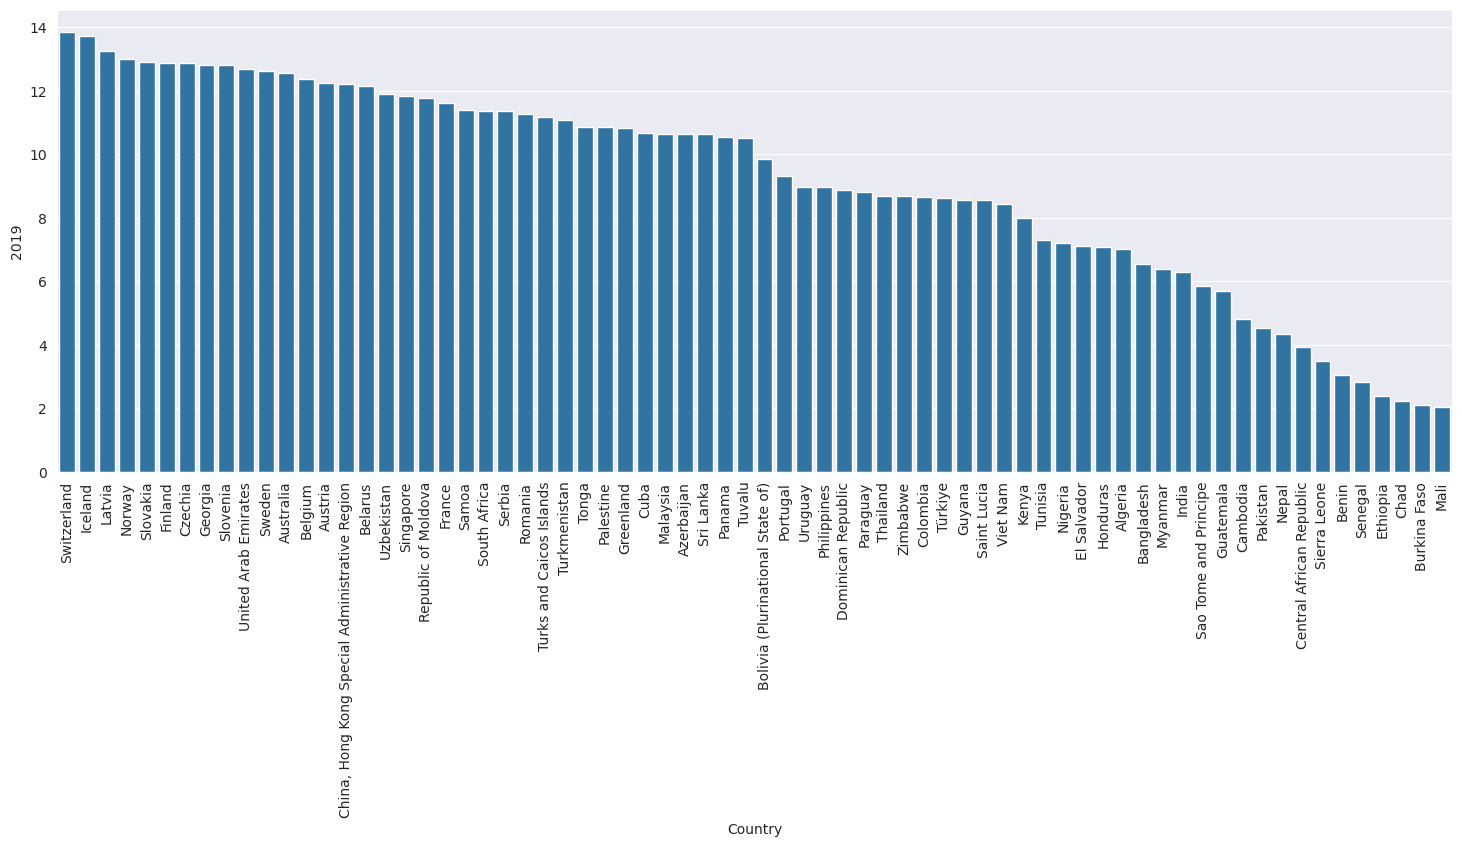

In [98]:
#Plotar barplot com a escolaridade média dos países

ano=2019

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.barplot(data=mean_year_schooling.sort_values(by=ano,ascending=False).dropna(subset=ano),x="Country",y=ano)



In [99]:
#Criar um dataframe onde em cada coluna os paises estão ordenado pela escolaridade média

anos=np.arange(2017,2024)
df_paises_mean_year_schooling={}

for ano in anos:
    df_paises_mean_year_schooling[str(ano)]=mean_year_schooling.sort_values(by=ano,ascending=False).reset_index(drop=True).loc[:,"Country"] 
df_paises_mean_year_schooling=pd.DataFrame.from_dict(df_paises_mean_year_schooling)
df_paises_mean_year_schooling.index=np.arange(1,len(df_paises_mean_year_schooling)+1)
df_paises_mean_year_schooling.index.rename("Rank",inplace=True)
df_paises_mean_year_schooling

,2017,2018,2019,2020,2021,2022,2023
Rank,,,,,,,
1,Estonia,Germany,Switzerland,Germany,Canada,United States of America,Azerbaijan
2,United States of America,Switzerland,Iceland,Iceland,United States of America,United Arab Emirates,Estonia
3,Lithuania,Estonia,Latvia,United States of America,United Kingdom,Australia,United States of America
4,United Kingdom,United States of America,Norway,Estonia,Australia,Georgia,Lithuania
5,Norway,Georgia,Slovakia,Lithuania,United Arab Emirates,"China, Hong Kong Special Administrative Region",United Kingdom
...,...,...,...,...,...,...,...
275,Andorra,Andorra,Angola,Andorra,Angola,Anguilla,Andorra
276,American Samoa,American Samoa,Andorra,American Samoa,Andorra,Angola,American Samoa
277,Algeria,Algeria,American Samoa,Algeria,American Samoa,American Samoa,Algeria


In [100]:
ano=2020
mean_year_schooling.loc[:,["Country",ano]].sort_values(by=ano,ascending=False).head(20)

,Country,2020
222,Germany,14.25594
207,Iceland,13.76717
1,United States of America,13.68343
0,Estonia,13.54843
2,Lithuania,13.49810
3,United Kingdom,13.40612
149,Poland,13.16475
235,Denmark,12.96049
164,New Zealand,12.94469
199,Japan,12.66923


In [101]:
#Paises com as maiores escolaridade médias

ano=2018
fig = px.choropleth(mean_year_schooling, locations='Codigo Paises', color=ano,hover_name='Country',
            projection='natural earth')
title='Escolaridade Média por País em {}'.format(ano) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'},coloraxis_colorbar_x=0.85) #configuraçoes das margens do mapa, do titulo do gráfico e da posição do colorbar

fig.show()

In [102]:
#Criação de um daaframe que agrupa os dados do número de universidades por pais no top 100 dos três rankings e os dados de escolaridade média

anos_mean_year_schooling=[ano for ano in range(2017,2024)]
anos_mean_year_schooling+=['Codigo Paises']

location_top_100_mean_year_schooling=location_top_100_codigos_paises.join(mean_year_schooling.loc[:,anos_mean_year_schooling].set_index('Codigo Paises'),on='Codigo Paises',how='inner')
location_top_100_mean_year_schooling.drop(columns='Codigo Paises',inplace=True)
location_top_100_mean_year_schooling

,Ranking THE,Ranking QS,Ranking Shanghai,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,
United States,36,25,38,13.41329,13.50162,NaN,13.68343,13.57550,13.91420,NaN
United Kingdom,11,15,8,13.16133,NaN,NaN,13.40612,13.49290,NaN,NaN
Germany,8,5,4,NaN,14.07738,NaN,14.25594,NaN,NaN,NaN
China,7,5,10,NaN,7.81652,NaN,7.95142,NaN,NaN,NaN
Australia,6,9,6,12.32017,12.45901,12.56471,12.64336,12.78440,12.86539,NaN
Netherlands,6,2,3,NaN,12.32301,NaN,12.58163,NaN,NaN,NaN
Hong Kong,5,5,1,12.16905,NaN,12.22621,NaN,NaN,12.34777,NaN
France,4,4,4,11.40970,NaN,11.61006,NaN,NaN,NaN,NaN
Switzerland,3,2,5,NaN,13.79969,13.85966,NaN,NaN,NaN,NaN


## completo

In [103]:
numero_matriculados.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
0,Afghanistan,6350404.0,6544906.0,6777785.0,NaN,NaN,NaN,NaN,Primario,AFG
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ALA
2,Albania,174836.0,170861.0,167104.0,162170.0,158528.0,154140.0,NaN,Primario,ALB
3,Algeria,4283207.0,4429994.0,4580288.0,4852322.0,4852322.0,5050667.0,5187616.0,Primario,DZA
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ASM


In [104]:
numero_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 278
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1116 non-null   object 
 1   2017             689 non-null    float64
 2   2018             689 non-null    float64
 3   2019             685 non-null    float64
 4   2020             667 non-null    float64
 5   2021             646 non-null    float64
 6   2022             485 non-null    float64
 7   2023             52 non-null     float64
 8   Nivel de Ensino  1116 non-null   object 
 9   Codigo Paises    952 non-null    object 
dtypes: float64(7), object(3)
memory usage: 95.9+ KB


In [109]:
#Nos dados estão números para aagrupamentos de países, por exemplo OCDE, paises africano, paises desenvolvidos etc.
#A condição numero_matriculados['Codigo Paises'].notna() foi adicionada para que sejam selecionados somente países

numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna()) & (numero_matriculados['Nivel de Ensino']=='Primario'),:].sort_values(by=2021,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
99,India,123807892.0,122378527.0,120044806.0,121700126.0,122027751.0,131348083.2,131298001.0,Primario,IND
43,China,100321027.0,101872977.0,104325244.0,106250528.0,107730038.0,108019743.0,NaN,Primario,CHN
153,Nigeria,24543722.0,27889387.0,28078437.0,30100084.0,30455582.0,NaN,NaN,Primario,NGA
100,Indonesia,29351817.0,29425748.0,29120793.0,29329969.0,29241826.0,28829725.0,NaN,Primario,IDN
160,Pakistan,21686451.0,22931305.0,23587997.0,NaN,24276648.0,NaN,NaN,Primario,PAK
...,...,...,...,...,...,...,...,...,...,...
233,Venezuela (Bolivarian Republic of),3285299.0,3312560.0,NaN,NaN,NaN,NaN,NaN,Primario,VEN
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,YEM


In [110]:
numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna()) & (numero_matriculados['Nivel de Ensino']=='Secundario'),:].sort_values(by=2021,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
99,India,1.298292e+08,1.317598e+08,1.309328e+08,1.339623e+08,1.385115e+08,1.390980e+08,1.343421e+08,Secundario,IND
43,China,8.340792e+07,8.432186e+07,8.610170e+07,8.840992e+07,9.091919e+07,9.374084e+07,NaN,Secundario,CHN
100,Indonesia,2.431826e+07,2.489357e+07,2.543831e+07,2.623089e+07,2.680637e+07,2.708420e+07,NaN,Secundario,IDN
228,United States of America,2.478796e+07,2.487136e+07,2.501423e+07,2.518346e+07,2.543293e+07,2.519971e+07,NaN,Secundario,USA
28,Brazil,2.311818e+07,2.286391e+07,2.224834e+07,2.216234e+07,2.231155e+07,NaN,NaN,Secundario,BRA
...,...,...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,YEM
238,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,ZMB


In [111]:
numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna()) & (numero_matriculados['Nivel de Ensino']=='Tecnico'),:].sort_values(by=2021,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
228,United States of America,1.209539e+06,1.196510e+06,1.182524e+06,1.249890e+06,1.196384e+06,1.176491e+06,NaN,Tecnico,USA
99,India,NaN,NaN,NaN,2.521750e+06,1.045189e+06,1.134221e+06,1522607.191,Tecnico,IND
43,China,NaN,NaN,9.964030e+05,8.792060e+05,9.677420e+05,NaN,NaN,Tecnico,CHN
28,Brazil,8.743710e+05,8.948620e+05,9.628250e+05,9.365470e+05,8.360400e+05,NaN,NaN,Tecnico,BRA
81,Germany,7.657964e+05,7.706346e+05,7.420942e+05,7.435201e+05,7.219737e+05,NaN,NaN,Tecnico,DEU
...,...,...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tecnico,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tecnico,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tecnico,YEM
238,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tecnico,ZMB


In [112]:
numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna()) & (numero_matriculados['Nivel de Ensino']=='Universitario'),:].sort_values(by=2021,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
43,China,4.412751e+07,4.493517e+07,4.699361e+07,5.023746e+07,5.382303e+07,5.713828e+07,NaN,Universitario,CHN
99,India,3.337411e+07,3.433759e+07,3.514812e+07,3.639289e+07,3.887006e+07,4.054963e+07,41377424.0,Universitario,IND
228,United States of America,1.901453e+07,1.894197e+07,1.882591e+07,1.875701e+07,1.815943e+07,1.786012e+07,NaN,Universitario,USA
28,Brazil,8.571423e+06,8.741996e+06,8.897906e+06,8.986592e+06,9.312309e+06,9.769427e+06,NaN,Universitario,BRA
100,Indonesia,7.944099e+06,8.037218e+06,8.310582e+06,8.481838e+06,8.992031e+06,9.320129e+06,NaN,Universitario,IDN
...,...,...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,YEM
238,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,ZMB


## todo

In [104]:
proporcao_matriculados.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,AFG
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ALA
2,Albania,98.29327,98.35528,97.89225,96.60134,93.81288,90.79598,NaN,Primario,ALB
3,Algeria,99.76018,99.87218,99.87623,99.69847,99.80355,99.37132,99.02429,Primario,DZA
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ASM


## todo

In [105]:
investimento_porcentagem_PIB.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
0,Republic of Moldova,1.31753,1.34942,1.47847,1.56519,1.46903,1.55889,NaN,Primario,MDA
1,Sweden,1.20930,1.21220,1.11929,1.14501,NaN,NaN,NaN,Primario,SWE
2,Belarus,1.14853,NaN,1.18270,1.19771,1.10662,NaN,NaN,Primario,BLR
3,Mongolia,1.01300,0.99600,0.97200,1.27400,0.98600,1.27400,NaN,Primario,MNG
4,Ukraine,0.94626,0.89280,0.90628,0.88962,NaN,NaN,NaN,Primario,UKR


## Completo

In [106]:
investimento_em_milhoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        279 non-null    object 
 1   2017           123 non-null    float64
 2   2018           110 non-null    float64
 3   2019           90 non-null     float64
 4   2020           80 non-null     float64
 5   2021           43 non-null     float64
 6   2022           24 non-null     float64
 7   2023           0 non-null      float64
 8   Codigo Paises  238 non-null    object 
dtypes: float64(7), object(2)
memory usage: 19.7+ KB


In [107]:
investimento_em_milhoes.head(40)

,Country,2017,2018,2019,2020,2021,2022,2023,Codigo Paises
0,United States of America,1.030586e+06,1.013791e+06,1.056013e+06,1.177315e+06,NaN,NaN,NaN,USA
1,Germany,2.057727e+05,2.123767e+05,2.205447e+05,2.319347e+05,NaN,NaN,NaN,DEU
2,France,1.577995e+05,1.594327e+05,1.607873e+05,1.572263e+05,NaN,NaN,NaN,FRA
3,United Kingdom,1.559646e+05,1.529158e+05,1.570384e+05,1.671267e+05,NaN,NaN,NaN,GBR
4,India,1.034359e+05,1.119603e+05,1.064470e+05,1.218034e+05,123832.22685,NaN,NaN,IND
5,Brazil,9.965816e+04,9.771295e+04,9.687459e+04,9.068384e+04,NaN,NaN,NaN,BRA
6,Italy,8.660117e+04,9.196647e+04,8.891802e+04,8.778524e+04,NaN,NaN,NaN,ITA
7,Russian Federation,7.975156e+04,8.178568e+04,NaN,NaN,NaN,NaN,NaN,RUS
8,Canada,7.978509e+04,8.103382e+04,8.130717e+04,8.483874e+04,NaN,NaN,NaN,CAN
9,Republic of Korea,7.204225e+04,7.636077e+04,8.204228e+04,8.349583e+04,NaN,NaN,NaN,KOR


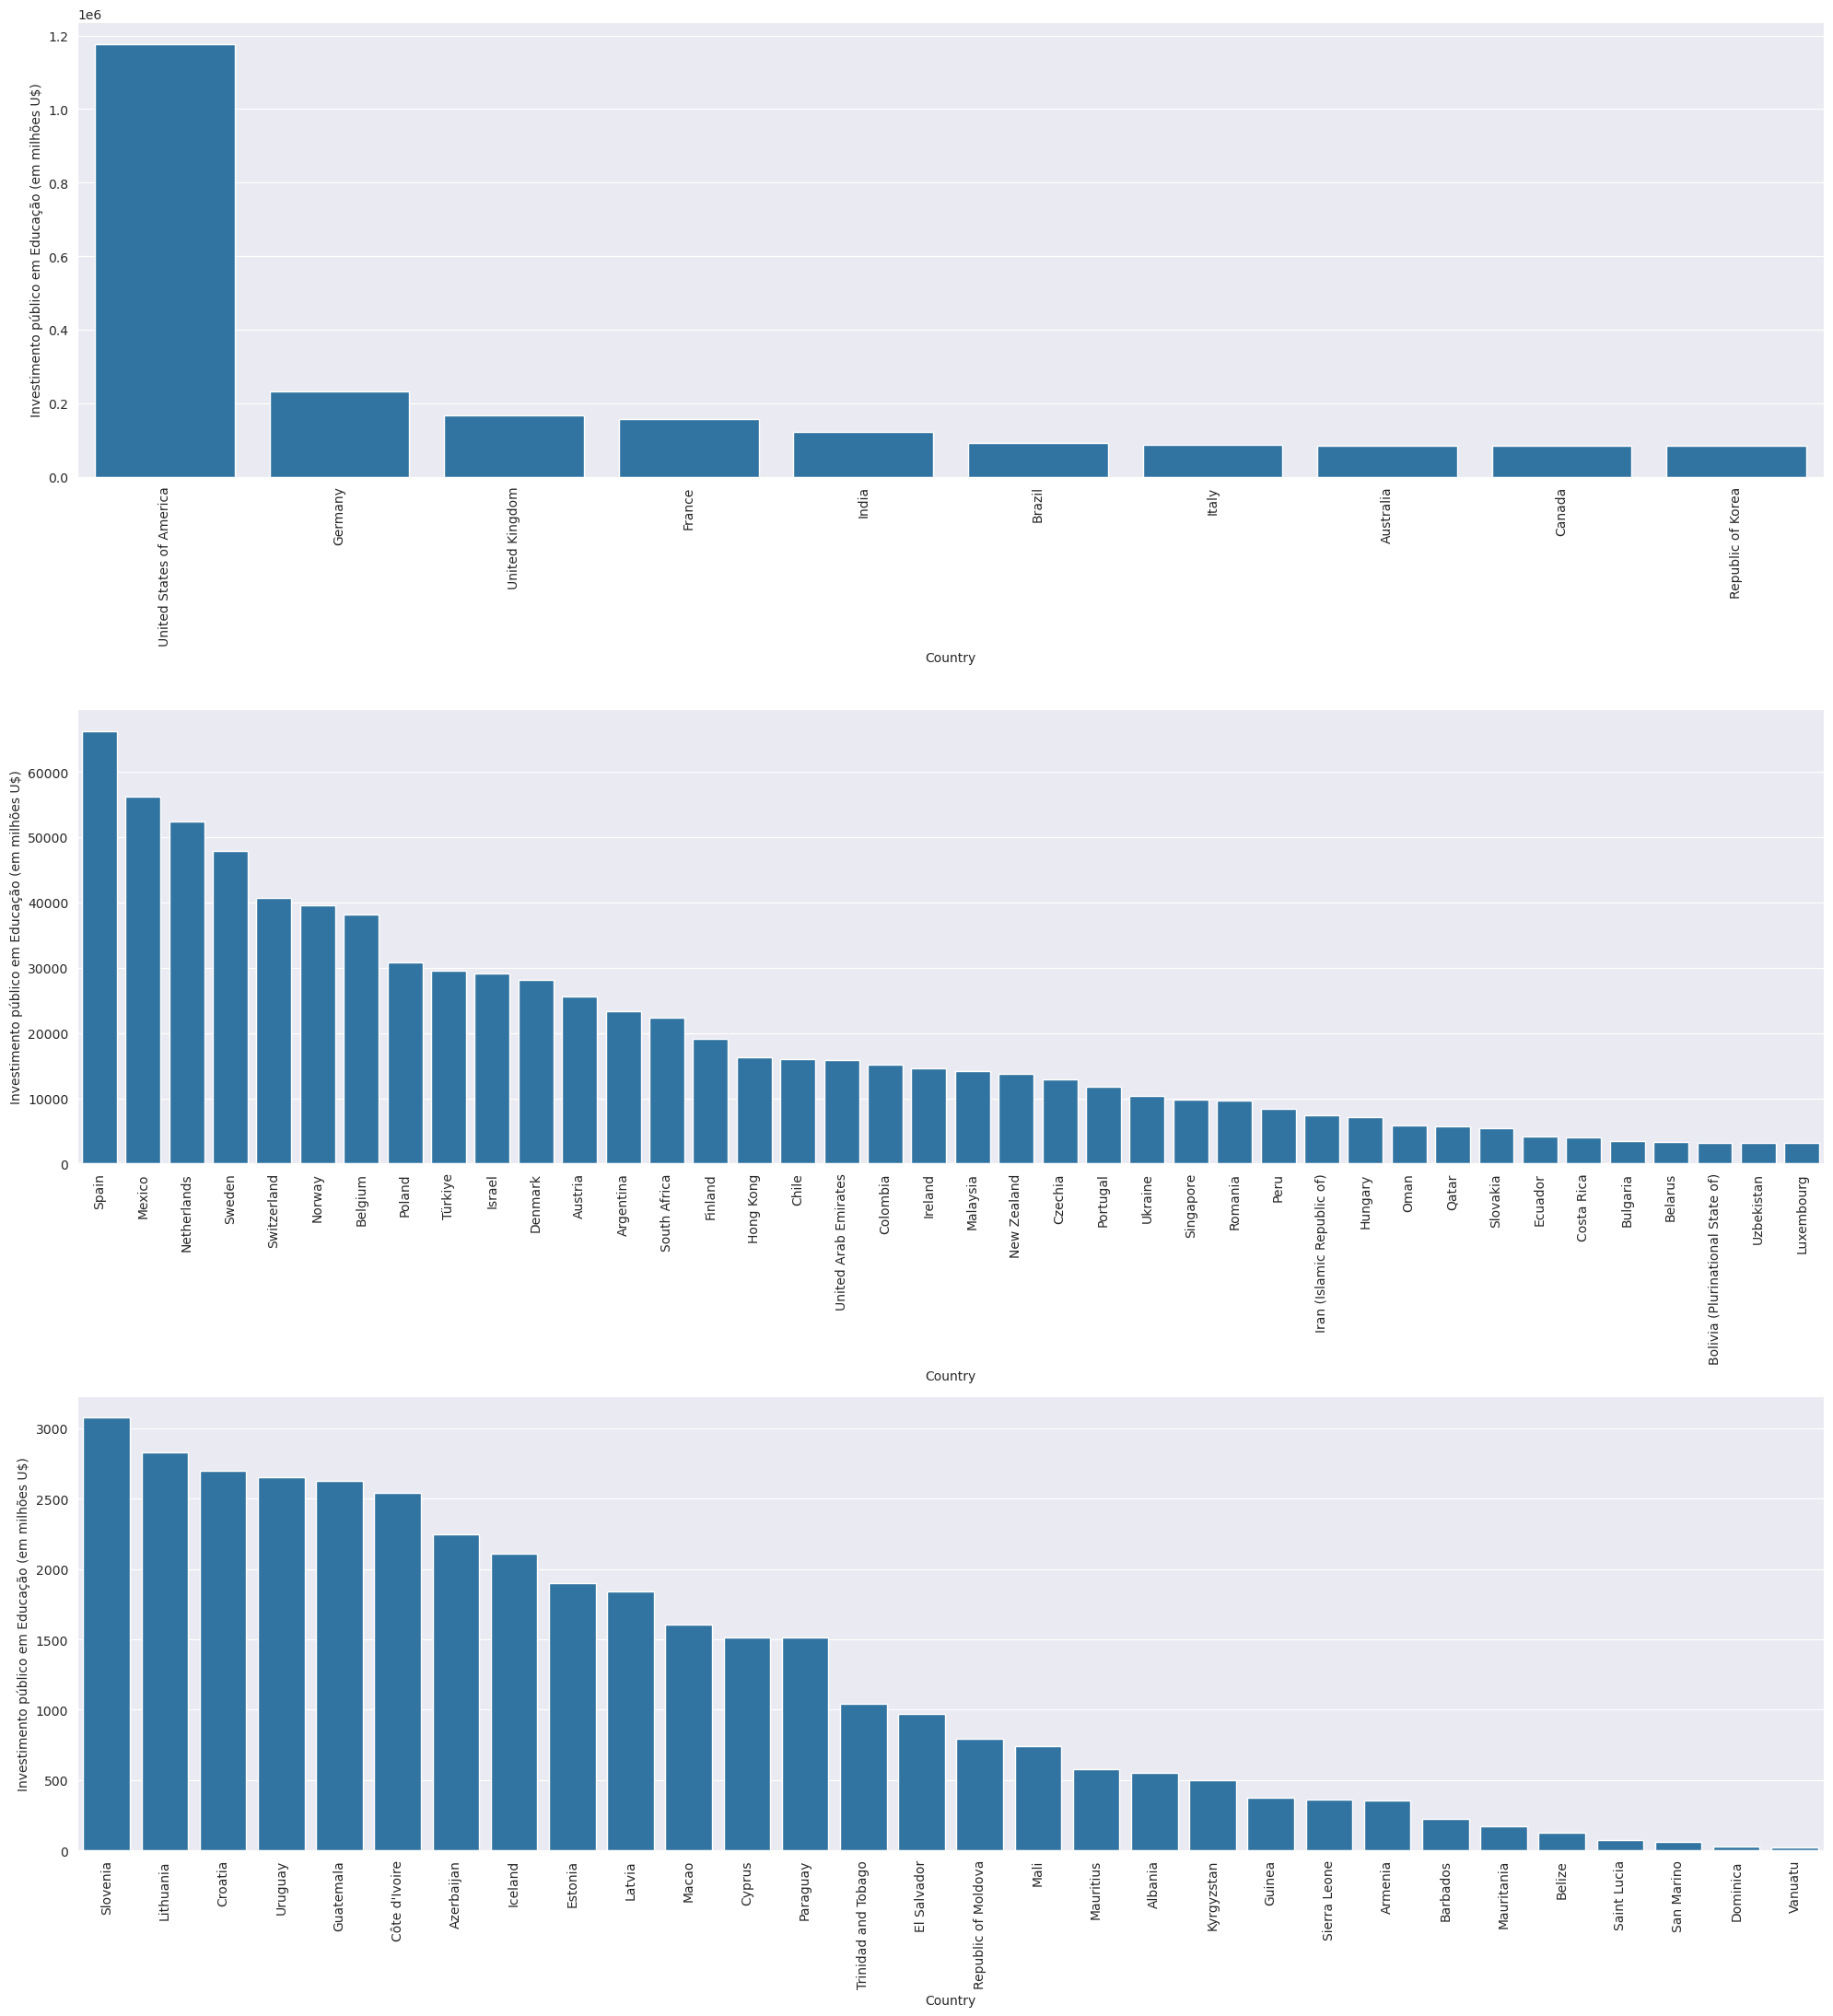

In [108]:
#Plotagem de um barplot com os investimentos dos paises
#Necessaŕio dividir em subplots devido a diferençã dos valores


ano=2020 #2017,2018,2019 ou 2020. Poucos dados para os anos mais recenes

n_rows=3
n_cols=1
fig,axs=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,22))
#plt.xticks(rotation=90)
sns.barplot(data=investimento_em_milhoes.sort_values(by=ano,ascending=False).dropna(subset=ano).iloc[0:10,:],x="Country",y=ano,ax=axs[0])
sns.barplot(data=investimento_em_milhoes.sort_values(by=ano,ascending=False).dropna(subset=ano).iloc[10:50,:],x="Country",y=ano,ax=axs[1])
sns.barplot(data=investimento_em_milhoes.sort_values(by=ano,ascending=False).dropna(subset=ano).iloc[50:,:],x="Country",y=ano,ax=axs[2])

for num in range(n_rows):
    axs[num].tick_params('x',labelrotation=90)
    axs[num].set_ylabel("Investimento público em Educação (em milhões U$)")
fig.tight_layout()

Text(0.5, 0, 'Investimento público em educação (em milhões US$)')

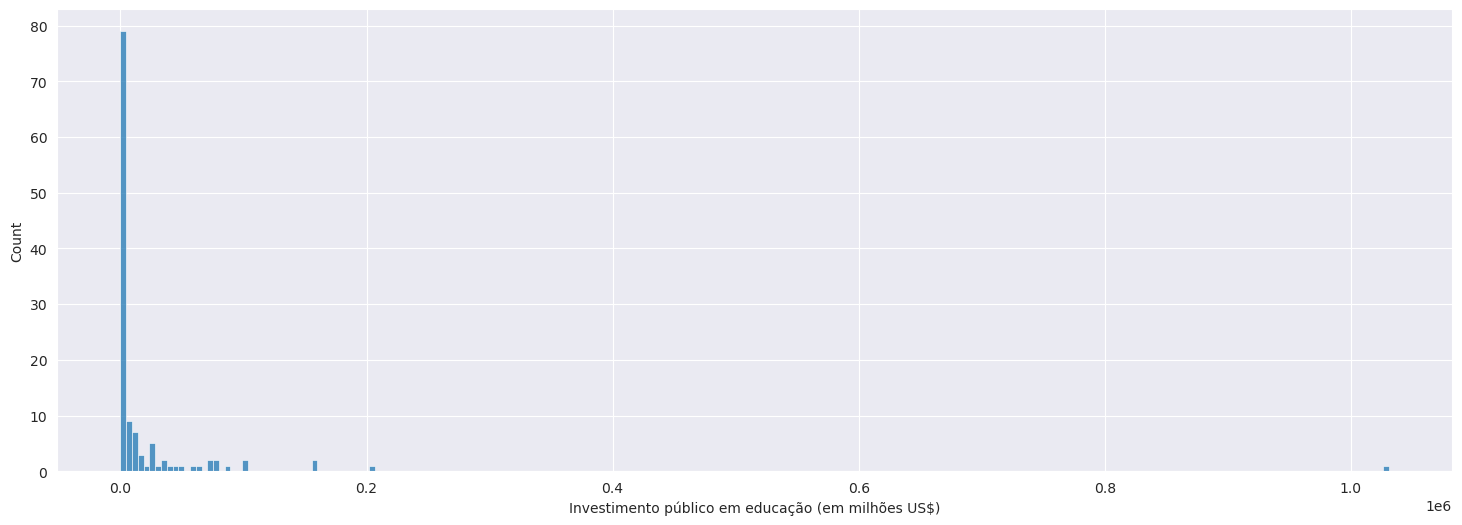

In [109]:
#Plotagem da distribuição do investimento público em educação

ano=2017
plt.figure(figsize=(18,6))
sns.histplot(data=investimento_em_milhoes.dropna(subset=ano),x=ano)
plt.xlabel("Investimento público em educação (em milhões US$)")

In [110]:
investimento_em_milhoes.describe()

,2017,2018,2019,2020,2021,2022,2023
count,1.230000e+02,1.100000e+02,9.000000e+01,8.000000e+01,43.000000,24.000000,0.0
mean,2.387763e+04,2.684942e+04,3.218996e+04,3.870833e+04,6404.104264,3035.088808,NaN
std,9.743421e+04,1.014358e+05,1.156730e+05,1.354896e+05,19215.505935,5211.677181,NaN
min,2.401698e+01,2.570002e+01,1.802643e+01,2.098332e+01,23.902220,18.381140,NaN
25%,5.713157e+02,5.549800e+02,1.065614e+03,1.781900e+03,439.548085,343.037185,NaN
50%,2.014261e+03,2.387525e+03,4.575351e+03,6.474433e+03,1039.063720,777.849190,NaN
75%,1.232280e+04,1.566184e+04,2.070326e+04,2.831783e+04,3213.327275,3135.813155,NaN
max,1.030586e+06,1.013791e+06,1.056013e+06,1.177315e+06,123832.226850,21902.325080,NaN


In [111]:
#Dataframe com numero de universidades no top 100 e o total de investimento publico dos paises em educação

location_top_100_investimento_total=location_top_100_codigos_paises.join(investimento_em_milhoes.set_index('Codigo Paises'),on="Codigo Paises")
location_top_100_investimento_total.drop(columns=['Codigo Paises','Country'],inplace=True)
location_top_100_investimento_total

,Ranking THE,Ranking QS,Ranking Shanghai,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,
United States,36,25,38,1.030586e+06,1.013791e+06,1.056013e+06,1.177315e+06,NaN,NaN,NaN
United Kingdom,11,15,8,1.559646e+05,1.529158e+05,1.570384e+05,1.671267e+05,NaN,NaN,NaN
Germany,8,5,4,2.057727e+05,2.123767e+05,2.205447e+05,2.319347e+05,NaN,NaN,NaN
China,7,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,6,9,6,7.427541e+04,7.620985e+04,7.801628e+04,8.517789e+04,NaN,NaN,NaN
Netherlands,6,2,3,4.978040e+04,5.275309e+04,5.179915e+04,5.233301e+04,NaN,NaN,NaN
Hong Kong,5,5,1,1.163884e+04,1.214034e+04,1.430258e+04,1.626116e+04,13798.79338,13691.95668,NaN
France,4,4,4,1.577995e+05,1.594327e+05,1.607873e+05,1.572263e+05,NaN,NaN,NaN
Switzerland,3,2,5,3.795255e+04,3.835691e+04,3.945833e+04,4.065083e+04,NaN,NaN,NaN


In [112]:
#Comparar os paises com universidades no top 100 com os upper quartiles (Q3) do investimento público total em educação (milhões US$)
# Q3 - 75 % dos países tem investimento público abaixo do Q3 e 25% acima

comparativo=[]
for ano in np.arange(2017,2021):
    comparativo.append(location_top_100_investimento_total[ano].dropna()>investimento_em_milhoes[ano].quantile(0.75).item())
comparativo= pd.concat(comparativo,axis=1)
comparativo

,2017,2018,2019,2020
Country,,,,
United States,True,True,True,True
United Kingdom,True,True,True,True
Germany,True,True,True,True
Australia,True,True,True,True
Netherlands,True,True,True,True
Hong Kong,False,False,False,False
France,True,True,True,True
Switzerland,True,True,True,True
South Korea,True,True,True,True


In [113]:
#Colorir dataframe para facilitar visualização

def great_that_high_quartile(val):
    
    if val==True:
        color='green'
    elif val==False:
        color = 'red' 
    else:
        color=None
    
    return f'background-color: {color}'

comparativo.style.apply(lambda x: x.map(great_that_high_quartile), axis=None)

,2017,2018,2019,2020
Country,,,,
United States,True,True,True,True
United Kingdom,True,True,True,True
Germany,True,True,True,True
Australia,True,True,True,True
Netherlands,True,True,True,True
Hong Kong,False,False,False,False
France,True,True,True,True
Switzerland,True,True,True,True
South Korea,True,True,True,True


In [114]:
#Criação de um dataframe que em uma coluna aparece o total investido pelos países dividido em categorias
#Escolhi dividir os investimentos em 5 níveis usando os quantiles


ano=2017
labels=['Very Low','Low',"Medium",'High','Very High']
categorias=pd.qcut(investimento_em_milhoes.loc[:,ano],q=len(labels),labels=labels).rename('Níveis de Investimento')
investimento_milhoes_categorias=pd.concat((investimento_em_milhoes.loc[:,["Codigo Paises","Country",ano]],categorias),axis=1)

In [115]:
#Plotar mapa múndi com paises coloridos de acordo com a categoria de investimento

fig = px.choropleth(investimento_milhoes_categorias, locations='Codigo Paises', color='Níveis de Investimento'
,hover_name='Country',
            projection='natural earth')
title='Total de investimentos públicos em educação por categorias em  {}'.format(ano) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'},coloraxis_colorbar_x=0.85) #configuraçoes das margens do mapa, do titulo do gráfico e da posição do colorbar

fig.show()

## Completo



In [116]:
investimentos_publicos_privados.head()

,Country,Ano,Investimentos Governamentais Totais,Investimentos Privados Totais,Investimentos Governamentais em Educacao Elementar e Secundaria,Investimentos Privados em Educacao Elementar e Secundaria,Investimentos Governamentais em Educacao Superior,Investimentos Privados em Educacao Superior,Codigo Paises
0,OECD average,2005,4.3,NaN,3.3,NaN,1.0,NaN,None
1,Australia,2005,3.9,NaN,3.2,NaN,0.7,NaN,AUS
2,Austria,2005,NaN,NaN,NaN,NaN,NaN,NaN,AUT
3,Belgium,2005,5.0,NaN,3.9,NaN,1.1,NaN,BEL
4,Canada,2005,4.4,NaN,3.1,NaN,1.3,NaN,CAN


In [117]:
investimentos_publicos_privados['Ano'].unique()

array([2005, 2010, 2015, 2018, 2019, 2020])

In [118]:
# Analisar os dados mais recentes (2020)
#Gastos Públicos

investimentos_publicos_2020=investimentos_publicos_privados.loc[investimentos_publicos_privados["Ano"]==2020,['Country','Investimentos Governamentais Totais',
                                                                                                            'Investimentos Governamentais em Educacao Elementar e Secundaria',
                                                                                                            'Investimentos Governamentais em Educacao Superior']].reset_index(drop=True)
investimentos_publicos_2020


,Country,Investimentos Governamentais Totais,Investimentos Governamentais em Educacao Elementar e Secundaria,Investimentos Governamentais em Educacao Superior
0,OECD average,4.3,3.3,1.0
1,Australia,4.4,3.7,0.7
2,Austria,4.6,3.0,1.6
3,Belgium,5.6,4.2,1.4
4,Canada,4.6,3.4,1.2
5,Chile,4.2,3.1,1.1
6,Colombia,4.6,4.1,0.5
7,Costa Rica,5.8,4.4,1.4
8,Czech Republic,4.0,3.1,0.8
9,Denmark,5.3,3.7,1.6


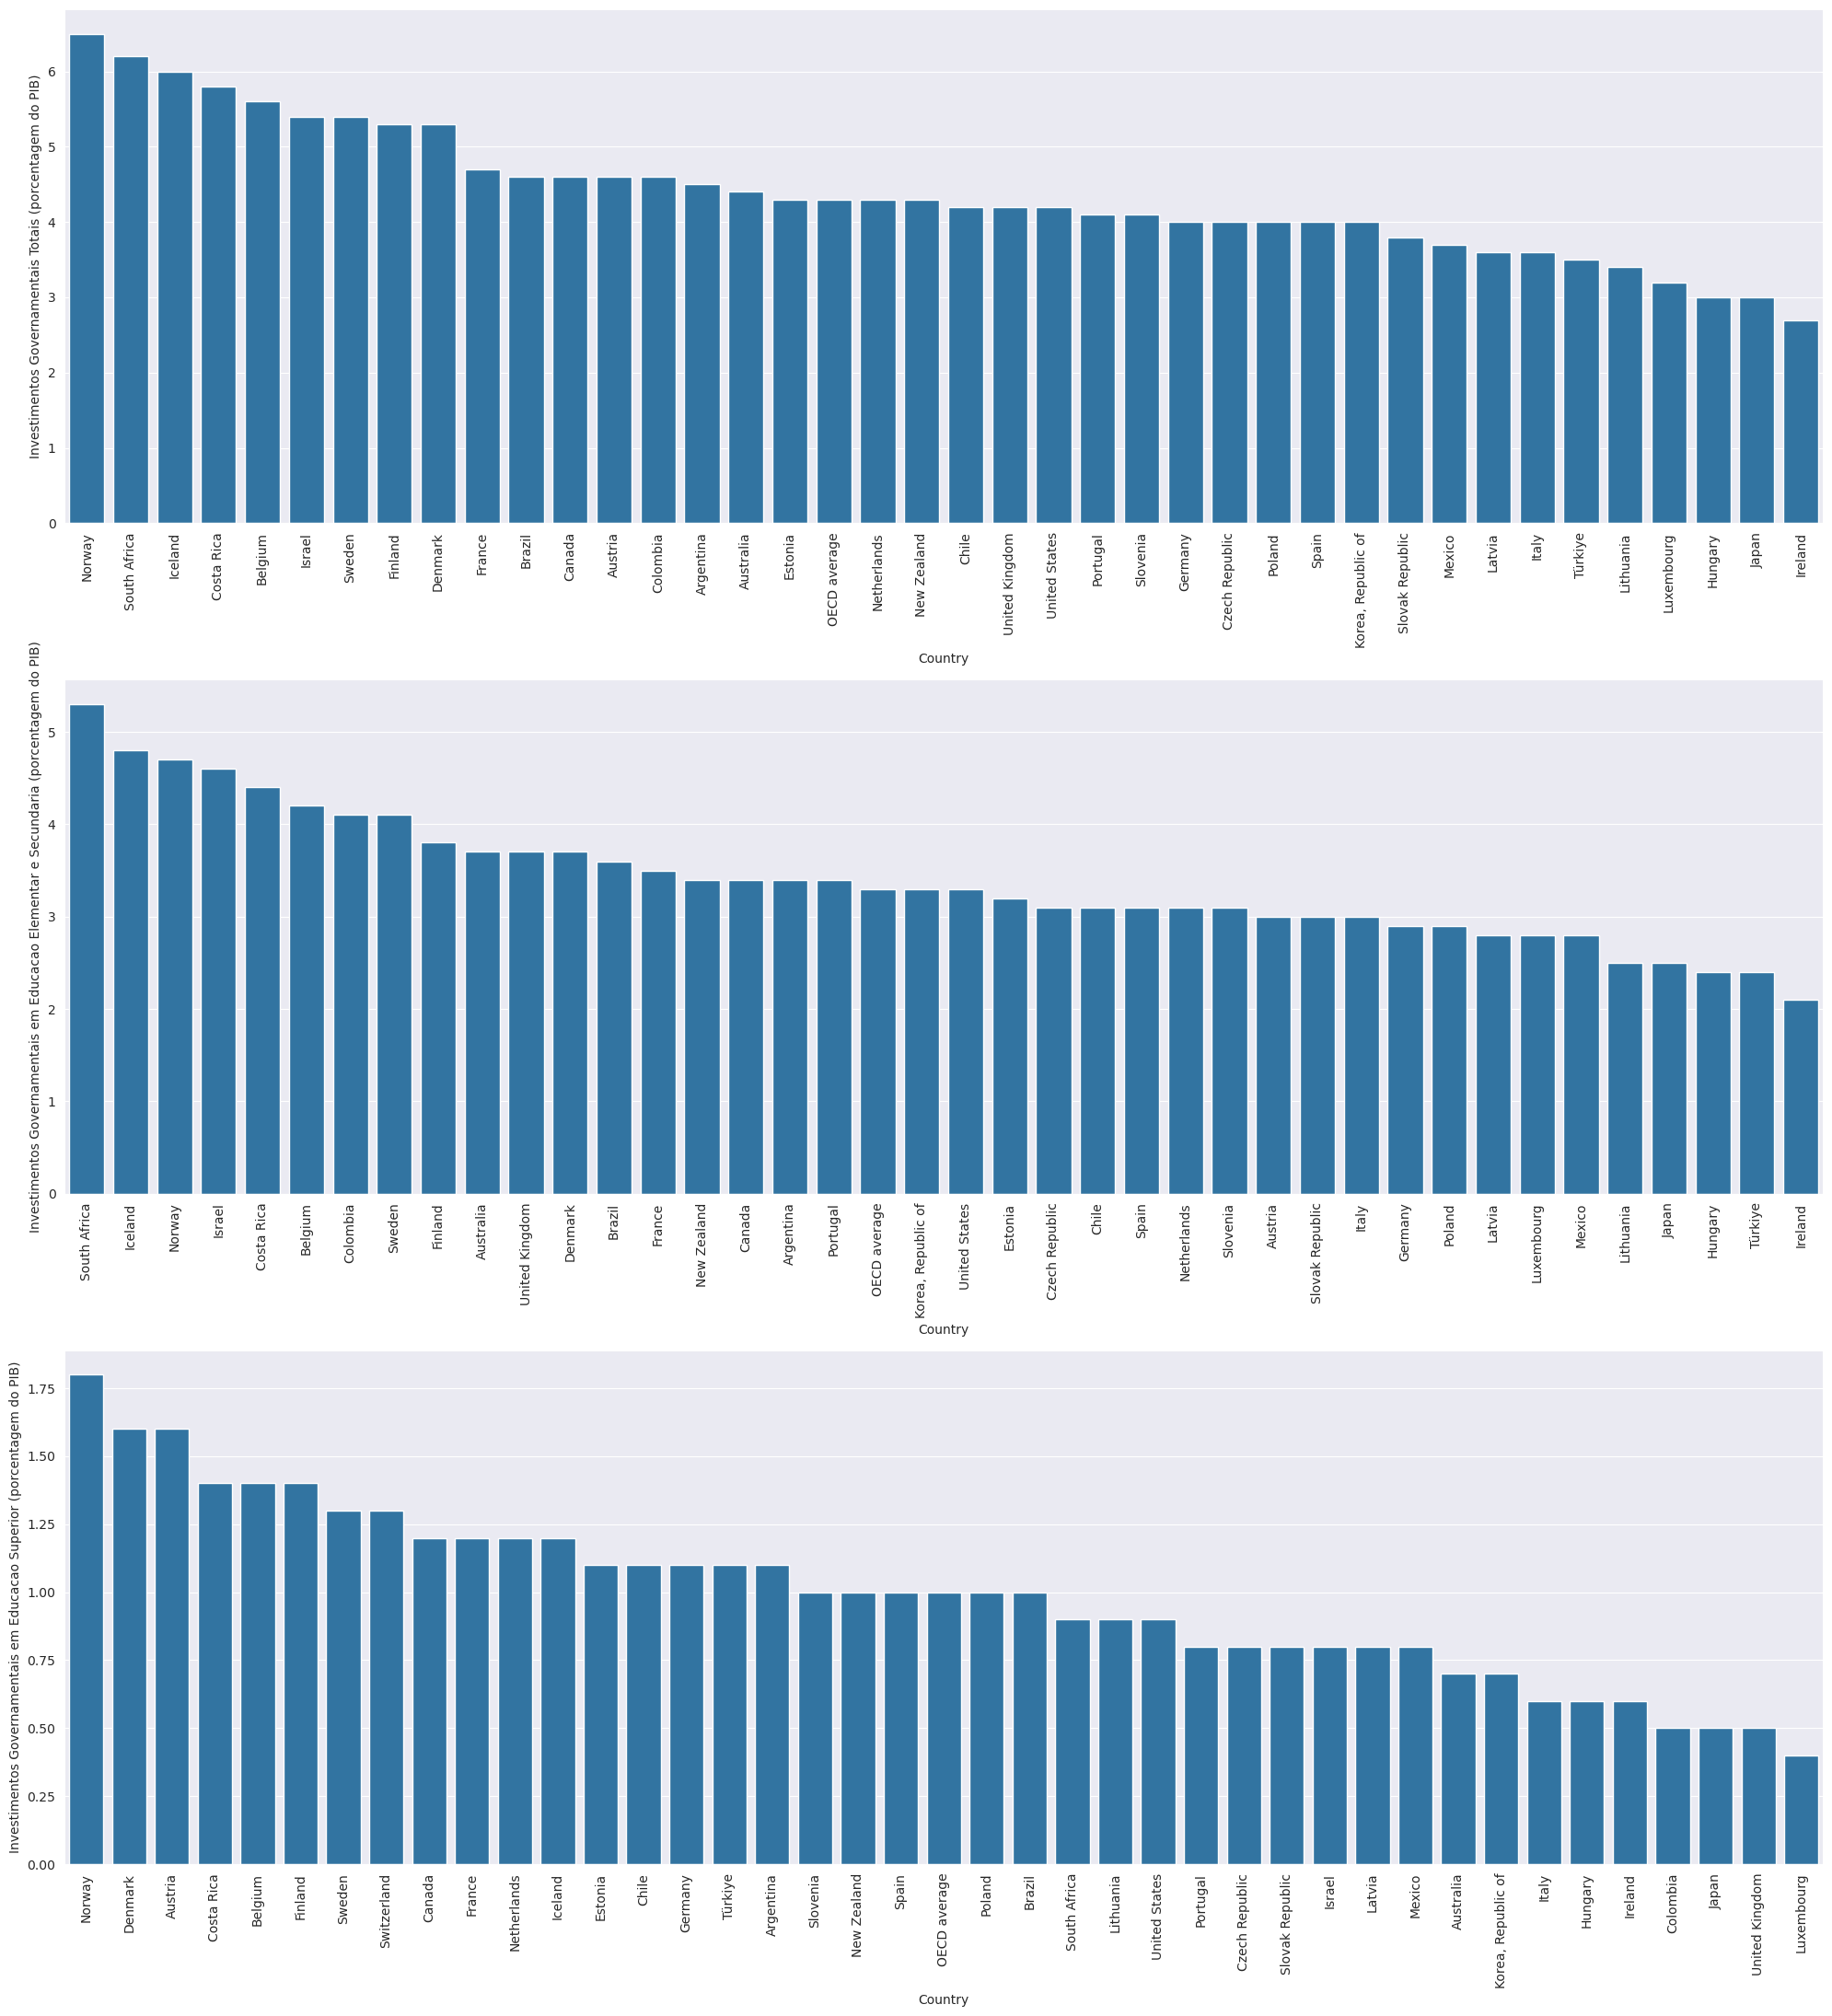

In [119]:
#Plotar barplot com o investimento publico em educação (porcentagem do PIB)

n_rows=3
n_cols=1

colunas=['Investimentos Governamentais Totais',
        'Investimentos Governamentais em Educacao Elementar e Secundaria',
        'Investimentos Governamentais em Educacao Superior']

fig,axs=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,22))
#plt.xticks(rotation=90)
sns.barplot(data=investimentos_publicos_2020.sort_values(by=colunas[0],ascending=False).dropna(subset=colunas[0]),
                                                    x="Country",y=colunas[0],ax=axs[0])
sns.barplot(data=investimentos_publicos_2020.sort_values(by=colunas[1],ascending=False).dropna(subset=colunas[1]),
                                                    x="Country",y=colunas[1],ax=axs[1])
sns.barplot(data=investimentos_publicos_2020.sort_values(by=colunas[2],ascending=False).dropna(subset=colunas[2]),
                                                    x="Country",y=colunas[2],ax=axs[2])



for num in range(n_rows):
    axs[num].tick_params('x',labelrotation=90)
    axs[num].set_ylabel(colunas[num]+" (porcentagem do PIB)")
fig.tight_layout()




Text(0, 0.5, 'Investimentos públicos direstos em educação como proporção do PIB')

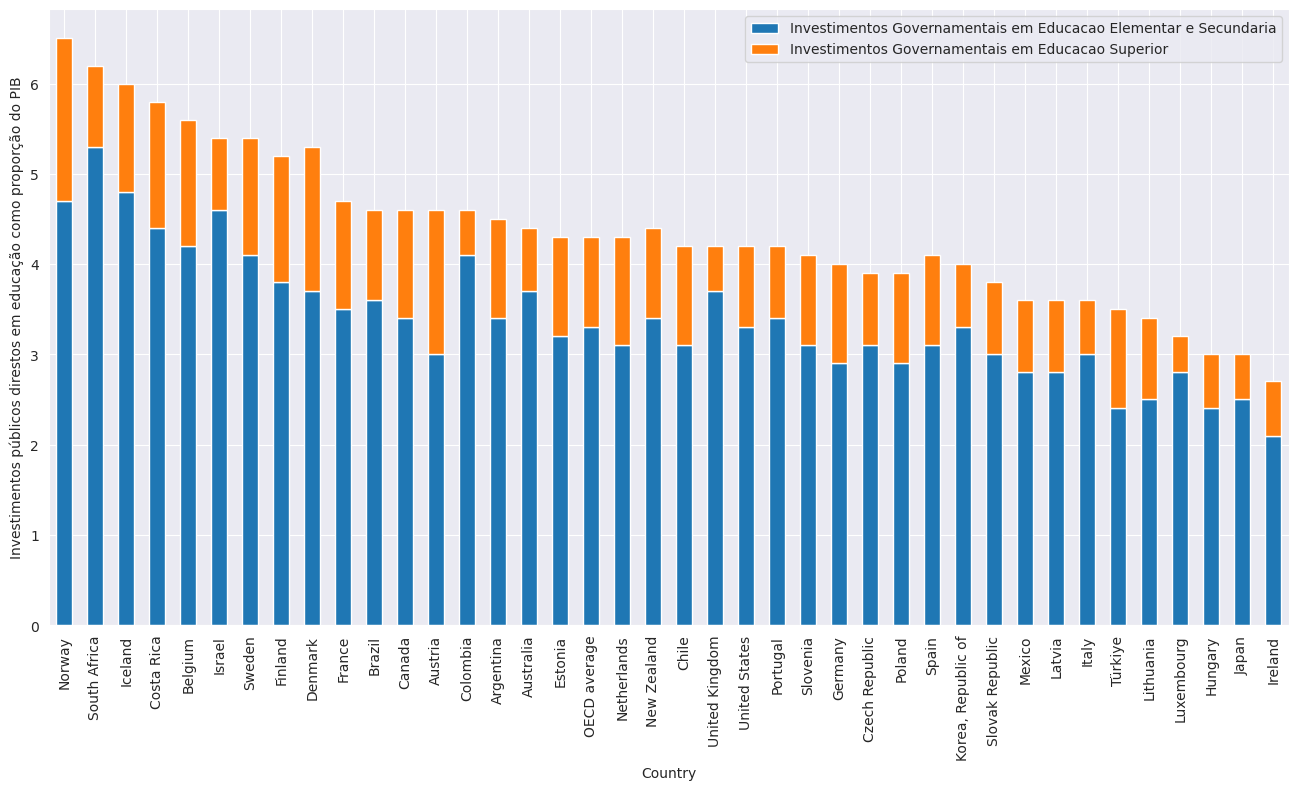

In [120]:
#Plotagem dos investimentos públicos em educação elementar+secundária e educação superior

colunas=['Country','Investimentos Governamentais em Educacao Elementar e Secundaria','Investimentos Governamentais em Educacao Superior']
investimentos_publicos_2020.sort_values(by='Investimentos Governamentais Totais',inplace=True,ascending=False)
investimentos_publicos_2020.loc[:,colunas].set_index('Country').dropna().plot(kind='bar',stacked=True,figsize=(16,8))
plt.ylabel("Investimentos públicos direstos em educação como proporção do PIB")


In [121]:
#Investimento privado direto em educação em 2020

investimentos_privados_2020=investimentos_publicos_privados.loc[investimentos_publicos_privados["Ano"]==2020,['Country','Investimentos Privados Totais',
                                                                                                            'Investimentos Privados em Educacao Elementar e Secundaria',
                                                                                                            'Investimentos Privados em Educacao Superior']].reset_index(drop=True)

In [122]:
investimentos_privados_2020

,Country,Investimentos Privados Totais,Investimentos Privados em Educacao Elementar e Secundaria,Investimentos Privados em Educacao Superior
0,OECD average,0.8,0.3,0.5
1,Australia,1.9,0.7,1.2
2,Austria,0.3,0.1,0.2
3,Belgium,0.3,0.1,0.2
4,Canada,1.4,0.3,1.2
5,Chile,2.3,0.7,1.6
6,Colombia,2.0,1.0,1.0
7,Costa Rica,NaN,NaN,0.1
8,Czech Republic,0.4,0.2,0.2
9,Denmark,0.4,0.2,0.2


Text(0, 0.5, 'Investimentos privados diretos em educação como proporção do PIB')

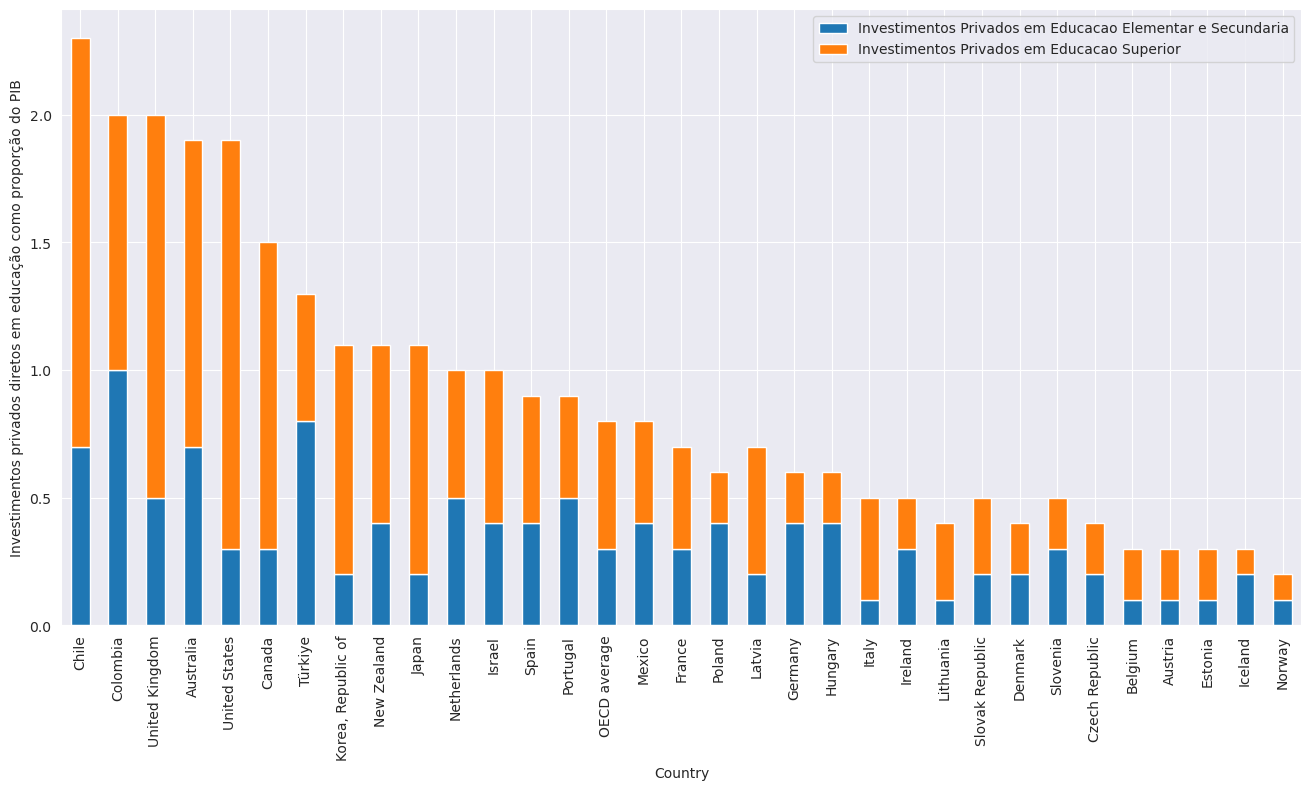

In [123]:
#Plotagem dos gastos privados em educação elementar+secundária e educação superior

colunas=['Country','Investimentos Privados em Educacao Elementar e Secundaria','Investimentos Privados em Educacao Superior']
investimentos_privados_2020.sort_values(by='Investimentos Privados Totais',inplace=True,ascending=False)
investimentos_privados_2020.loc[:,colunas].set_index('Country').dropna().plot(kind='bar',stacked=True,figsize=(16,8))
plt.ylabel("Investimentos privados diretos em educação como proporção do PIB")



<Axes: xlabel='Country'>

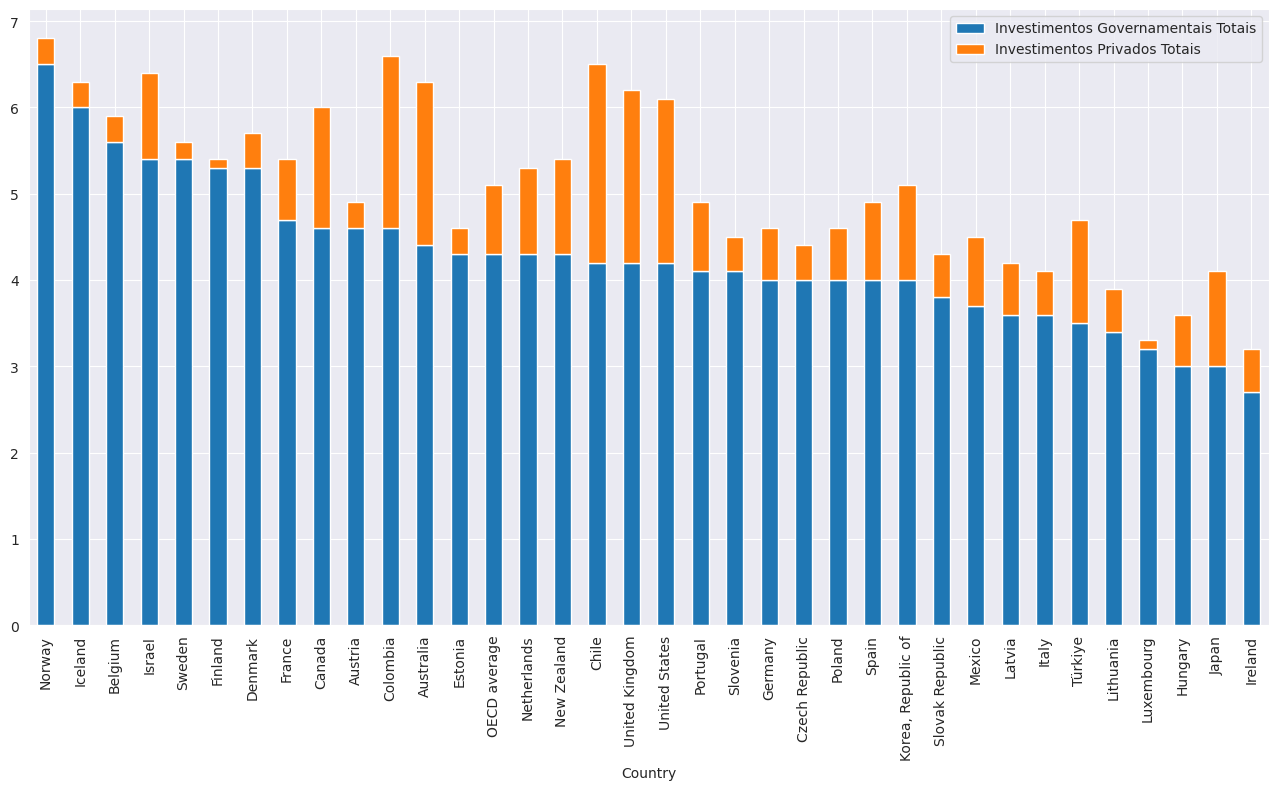

In [124]:
#Plotagem Gastos Governamentais Totais e Gastos Privados Totais

investimentos_publicos_privados_2020=investimentos_publicos_privados[investimentos_publicos_privados['Ano']==2020]
investimentos_publicos_privados_2020=investimentos_publicos_privados_2020.sort_values(by='Investimentos Governamentais Totais',ascending=False)
investimentos_publicos_privados_2020.loc[:,['Country','Investimentos Governamentais Totais','Investimentos Privados Totais']].set_index('Country').dropna().plot(kind='bar',stacked=True,figsize=(16,8))

In [125]:
location_top_100_investimentos_publicos_privados=location_top_100_codigos_paises.join(investimentos_publicos_privados_2020.set_index('Codigo Paises'),on='Codigo Paises')
location_top_100_investimentos_publicos_privados.drop(columns=['Country','Ano'],inplace=True)

In [126]:
investimentos_publicos_privados.describe().loc[:,'Investimentos Governamentais Totais':]

,Investimentos Governamentais Totais,Investimentos Privados Totais,Investimentos Governamentais em Educacao Elementar e Secundaria,Investimentos Privados em Educacao Elementar e Secundaria,Investimentos Governamentais em Educacao Superior,Investimentos Privados em Educacao Superior
count,243.000000,36.000000,248.000000,34.000000,245.000000,36.000000
mean,4.211111,0.819444,3.243548,0.335294,0.964082,0.513889
std,0.881256,0.585940,0.669732,0.217259,0.324315,0.439580
min,2.300000,0.100000,1.800000,0.100000,0.200000,0.100000
25%,3.600000,0.400000,2.700000,0.200000,0.700000,0.200000
50%,4.100000,0.600000,3.200000,0.300000,1.000000,0.400000
75%,4.700000,1.100000,3.700000,0.400000,1.100000,0.625000
max,6.600000,2.300000,5.300000,1.000000,1.800000,1.600000


In [127]:
location_top_100_investimentos_publicos_privados.describe().loc[:,'Investimentos Governamentais Totais':]

,Investimentos Governamentais Totais,Investimentos Privados Totais,Investimentos Governamentais em Educacao Elementar e Secundaria,Investimentos Privados em Educacao Elementar e Secundaria,Investimentos Governamentais em Educacao Superior,Investimentos Privados em Educacao Superior
count,20.00000,18.000000,20.000000,17.000000,21.000000,18.000000
mean,4.48000,1.033333,3.455000,0.352941,1.038095,0.700000
std,0.87395,0.641689,0.641934,0.177192,0.345653,0.524685
min,2.70000,0.200000,2.100000,0.100000,0.500000,0.100000
25%,4.15000,0.525000,3.100000,0.200000,0.800000,0.200000
50%,4.35000,1.000000,3.400000,0.300000,1.100000,0.550000
75%,4.85000,1.325000,3.700000,0.400000,1.200000,1.125000
max,6.50000,2.300000,4.700000,0.700000,1.800000,1.600000
